In [1]:
import uproot
import numpy as np
import math
import torch
import matplotlib.pyplot as plt
from torch_geometric.data import Data
import networkx as nx
import sys

In [2]:
#############################
# Some config
#############################
PLOT_DISTRIBUTIONS = True
CHEAT_DIRECTION = True
CHEAT_PID = True
DO_NORMALISATION = True
ADD_NEUTRINO = True

MAKE_PARTICLE_PARTICLE_LINKS = True

In [3]:
#############################
# Normalisation values
#############################

# track shower score
trackShowerLimitLow = -1.0
trackShowerLimitHigh = 1.0
trackShowerInterval = math.fabs(trackShowerLimitLow) + math.fabs(trackShowerLimitHigh)

# nHits
nHitsLimitLow = 0
nHitsLimitHigh = 2000
nHitsInterval = math.fabs(nHitsLimitLow) + math.fabs(nHitsLimitHigh)

# charge
chargeLimitLow = 0
chargeLimitHigh = 1e6
chargeInterval = math.fabs(chargeLimitLow) + math.fabs(chargeLimitHigh)

# vertex x
vertexXLimitLow = -400
vertexXLimitHigh = 400
vertexXInterval = math.fabs(vertexXLimitLow) + math.fabs(vertexXLimitHigh)

# vertex y
vertexYLimitLow = -1400
vertexYLimitHigh = 1400
vertexYInterval = math.fabs(vertexYLimitLow) + math.fabs(vertexYLimitHigh)

# vertex z
vertexZLimitLow = -100
vertexZLimitHigh = 1500
vertexZInterval = math.fabs(vertexZLimitLow) + math.fabs(vertexZLimitHigh)

# showerDirX_vis
showerDirLimitLow = -1.1
showerDirLimitHigh = 1.1
showerDirInterval = math.fabs(showerDirLimitLow) + math.fabs(showerDirLimitHigh)

# ivysaurusMuon
ivysaurusLimitLow = -1.0
ivysaurusLimitHigh = 1.0
ivysaurusInterval = math.fabs(ivysaurusLimitLow) + math.fabs(ivysaurusLimitHigh)

# wiggliness
wigglinessLimitLow = -1.0
wigglinessLimitHigh = 60.0
wigglinessInterval = math.fabs(wigglinessLimitLow) + math.fabs(wigglinessLimitHigh)

# trackLength
trackLengthLimitLow = -100.0
trackLengthLimitHigh = 1000.0
trackLengthInterval = math.fabs(trackLengthLimitLow) + math.fabs(trackLengthLimitHigh)

# displacement
displacementLimitLow = -10.0
displacementLimitHigh = 100.0
displacementInterval = math.fabs(displacementLimitLow) + math.fabs(displacementLimitHigh)

# dca
dcaLimitLow = -10.0
dcaLimitHigh = 50.0  
dcaInterval = math.fabs(dcaLimitLow) + math.fabs(dcaLimitHigh)

# pathway
pathwayLengthLow = -1.0
pathwayLengthHigh = 30.0
pathwayLengthInterval = math.fabs(pathwayLengthLow) + math.fabs(pathwayLengthHigh)

# pathwayScatteringAngle2D
pathwayScatteringAngle2DLow = -1.0
pathwayScatteringAngle2DHigh = 10.0
pathwayScatteringAngle2DInterval = math.fabs(pathwayScatteringAngle2DLow) + math.fabs(pathwayScatteringAngle2DHigh)

# nShowerStartHits
nShowerStartHitsLow = -1.0
nShowerStartHitsHigh = 2000
nShowerStartHitsInterval = math.fabs(nShowerStartHitsLow) + math.fabs(nShowerStartHitsHigh)

# showerScatterAngle
showerScatterAngleLow = -1.0
showerScatterAngleHigh = 40.0
showerScatterAngleInterval = math.fabs(showerScatterAngleLow) + math.fabs(showerScatterAngleHigh)

# nuVertexEnergyAsymmetry
nuVertexEnergyAsymmetryLow = -0.5
nuVertexEnergyAsymmetryHigh = 1.0
nuVertexEnergyAsymmetryInterval = math.fabs(nuVertexEnergyAsymmetryLow) + math.fabs(nuVertexEnergyAsymmetryHigh)

# showerStartEnergyAsymmetry
showerStartEnergyAsymmetryLow = -0.5
showerStartEnergyAsymmetryHigh = 1.0
showerStartEnergyAsymmetryInterval = math.fabs(showerStartEnergyAsymmetryLow) + math.fabs(showerStartEnergyAsymmetryHigh)
    
# nuVertexEnergyWeightedMeanRadialDistance
nuVertexEnergyWeightedMeanRadialDistanceLow = -1.0
nuVertexEnergyWeightedMeanRadialDistanceHigh = 20.0
nuVertexEnergyWeightedMeanRadialDistanceInterval = math.fabs(nuVertexEnergyWeightedMeanRadialDistanceLow) + math.fabs(nuVertexEnergyWeightedMeanRadialDistanceHigh)

# showerMoliereRadius
showerMoliereRadiusLow = -1.0
showerMoliereRadiusHigh = 10.0
showerMoliereRadiusInterval = math.fabs(showerMoliereRadiusLow) + math.fabs(showerMoliereRadiusHigh)

# showerOpeningAngle
showerOpeningAngleLow = -1.0
showerOpeningAngleHigh = 20.0
showerOpeningAngleInterval = math.fabs(showerOpeningAngleLow) + math.fabs(showerOpeningAngleHigh)

# foundHitRatio
foundHitRatioLow = -1.0
foundHitRatioHigh = 1.5
foundHitRatioInterval = math.fabs(foundHitRatioLow) + math.fabs(foundHitRatioHigh)

# initialGapSize
initialGapSizeLow = -1.0
initialGapSizeHigh = 4.0
initialGapSizeInterval = math.fabs(initialGapSizeLow) + math.fabs(initialGapSizeHigh)

# largestProjectedGapSize
largestProjectedGapSizeLow = -1.0
largestProjectedGapSizeHigh = 2.0
largestProjectedGapSizeInterval = math.fabs(largestProjectedGapSizeLow) + math.fabs(largestProjectedGapSizeHigh)

# nViewsWithAmbiguousHits
nViewsWithAmbiguousHitsLow = -1.0
nViewsWithAmbiguousHitsHigh = 3.0
nViewsWithAmbiguousHitsInterval = math.fabs(nViewsWithAmbiguousHitsLow) + math.fabs(nViewsWithAmbiguousHitsHigh)

# ambiguousHitMaxUnaccountedEnergy
ambiguousHitMaxUnaccountedEnergyLow = -10.0
ambiguousHitMaxUnaccountedEnergyHigh = 10.0
ambiguousHitMaxUnaccountedEnergyInterval = math.fabs(ambiguousHitMaxUnaccountedEnergyLow) + math.fabs(ambiguousHitMaxUnaccountedEnergyHigh)

# nonNuParentL
nonNuParentLLow = -300.0
nonNuParentLHigh = 300.0
nonNuParentLInterval = math.fabs(nonNuParentLLow) + math.fabs(nonNuParentLHigh)

# nonNuParentT
nonNuParentTLow = -1.0
nonNuParentTHigh = 100.0
nonNuParentTInterval = math.fabs(nonNuParentTLow) + math.fabs(nonNuParentTHigh)


In [4]:
#############################
# Let's read the file
#############################

#fileName = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/nue_dune10kt_1x2x6_1124_526_20230828T185125Z_gen_g4_detsim_hitreco_ccnutree'#'/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/ccnutree_higherStats'
#fileName = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/ccnutree_higherStats'
fileName = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/nue_dune10kt_1x2x6_1124_526_20230828T185125Z_gen_g4_detsim_hitreco_ccnutree'
inputFileName = fileName + '.root'
outputFileName = fileName + '.npz'

treeFile = uproot.open(inputFileName)
tree = treeFile['ccnuselection/ccnusel']
branches = tree.arrays()

In [5]:
#############################
# Get event-level stuff
#############################
run = np.array(branches['Run'])
subrun = np.array(branches['SubRun'])
event = np.array(branches['Event'])

recoNuVertexX = branches['RecoNuVtxX']
recoNuVertexY = branches['RecoNuVtxY']
recoNuVertexZ = branches['RecoNuVtxZ']
    
#############################
# Get pfp-level stuff - these cannot be numpy arrays...
#############################
trackShowerScore_main = branches['RecoPFPTrackShowerScore']
nHits_main = branches['RecoPFPRecoNHits']
charge_main = branches['RecoPFPRecoCharge']
vertexX_main = branches['RecoPFPRecoVertexX']
vertexY_main = branches['RecoPFPRecoVertexY']
vertexZ_main = branches['RecoPFPRecoVertexZ']
trackEndX_main = branches['RecoTrackRecoEndX']
trackEndY_main = branches['RecoTrackRecoEndY']
trackEndZ_main = branches['RecoTrackRecoEndZ']
showerDirX_main = branches['RecoShowerRecoDirX']  # not the best direction estimate, placeholder
showerDirY_main = branches['RecoShowerRecoDirY']
showerDirZ_main = branches['RecoShowerRecoDirZ']
ivysaurusMuon_main = branches['RecoPFPIvysaurusMuon']
ivysaurusProton_main = branches['RecoPFPIvysaurusProton']
ivysaurusPion_main = branches['RecoPFPIvysaurusPion']
ivysaurusElectron_main = branches['RecoPFPIvysaurusElectron']
ivysaurusPhoton_main = branches['RecoPFPIvysaurusPhoton']
wiggliness_main = branches['RecoTrackDeflecAngleSD']
trackLength_main = branches['RecoTrackLength']
displacement_main = branches['RecoShowerPandrizzleDisplacement']
dca_main = branches['RecoShowerPandrizzleDCA']
recoGeneration_main = branches['RecoPFPRecoGeneration']
recoSelf_main = branches['RecoPFPSelf']
pathwayLength_main = branches['RecoShowerPandrizzlePathwayLengthMin']
pathwayScatteringAngle2D_main = branches['RecoShowerPandrizzleMaxShowerStartPathwayScatteringAngle2D']
nShowerStartHits_main = branches['RecoShowerPandrizzleMaxNPostShowerStartHits']
showerScatterAngle_main = branches['RecoShowerPandrizzleMaxPostShowerStartScatterAngle']
nuVertexEnergyAsymmetry_main = branches['RecoShowerPandrizzleMaxPostShowerStartNuVertexEnergyAsymmetry']
showerStartEnergyAsymmetry_main = branches['RecoShowerPandrizzleMaxPostShowerStartShowerStartEnergyAsymmetry']
nuVertexEnergyWeightedMeanRadialDistance_main = branches['RecoShowerPandrizzleMaxPostShowerStartNuVertexEnergyWeightedMeanRadialDistance']
showerMoliereRadius_main = branches['RecoShowerPandrizzleMinPostShowerStartShowerStartMoliereRadius']
showerOpeningAngle_main = branches['RecoShowerPandrizzleMaxPostShowerStartOpeningAngle']
foundHitRatio_main = branches['RecoShowerPandrizzleMaxFoundHitRatio']
initialGapSize_main = branches['RecoShowerPandrizzleMaxInitialGapSize']
largestProjectedGapSize_main = branches['RecoShowerPandrizzleMinLargestProjectedGapSize']
nViewsWithAmbiguousHits_main = branches['RecoShowerPandrizzleNViewsWithAmbiguousHits']
ambiguousHitMaxUnaccountedEnergy_main = branches['RecoShowerPandrizzleAmbiguousHitMaxUnaccountedEnergy']

# True information.. (for cheating)
pfpTrueMomX_main = branches['RecoPFPTrueMomX']
pfpTrueMomY_main = branches['RecoPFPTrueMomY']
pfpTrueMomZ_main = branches['RecoPFPTrueMomZ']
pfpTruePDG_main = branches['RecoPFPTruePDG']

#############################
# Network truth - these cannot be numpy arrays...
#############################
trueVisibleGeneration_main = branches['RecoPFPTrueVisibleGeneration']
trueTrackID_main = branches['RecoPFPTrueTrackID']
trueVisibleParentTrackID_main = branches['RecoPFPTrueVisibleParentTrackID']

#############################
# How many entries are we working with?
#############################
nEntries = run.shape[0]
print('We are working with:', nEntries, 'entries')

We are working with: 10 entries


In [6]:
#############################
# Let's create our graphs!
#############################

data_set_pos = []
data_set_neg = []
data_set_FC = []
true_gen_vis = []

# These are our arrays for visualisation
trackShowerScore_vis = []
nHits_vis = []
charge_vis = []
vertexX_vis = []
vertexY_vis = []
vertexZ_vis = []
trackEndX_vis = []
trackEndY_vis = []
trackEndZ_vis = []
showerDirX_vis = []
showerDirY_vis = []
showerDirZ_vis = []
ivysaurusMuon_vis = []
ivysaurusProton_vis = []
ivysaurusPion_vis = []
ivysaurusElectron_vis = []
ivysaurusPhoton_vis = []
wiggliness_vis = []
trackLength_vis = []
displacement_vis = []
dca_vis = []
pathwayLength_vis = []
pathwayScatteringAngle2D_vis = []
nShowerStartHits_vis = []
showerScatterAngle_vis = []
nuVertexEnergyAsymmetry_vis = []
showerStartEnergyAsymmetry_vis = []
nuVertexEnergyWeightedMeanRadialDistance_vis = []
showerMoliereRadius_vis = []
showerOpeningAngle_vis = []
foundHitRatio_vis = []
initialGapSize_vis = []
largestProjectedGapSize_vis = []
nViewsWithAmbiguousHits_vis = []
ambiguousHitMaxUnaccountedEnergy_vis = []
nonNuParentTrackShowerScore_vis = []
nonNuParentTrackLength_vis = []
nonNuParentVertexX_vis = []
nonNuParentVertexY_vis = []
nonNuParentVertexZ_vis = []
nonNuParentShowerDirX_vis = []
nonNuParentShowerDirY_vis = []
nonNuParentShowerDirZ_vis = []
nonNuParentL_vis = []
nonNuParentT_vis = []
nonNuParentDCA_vis = []
  
# look at OPERA GHOST (OG Pandora) info, to make performance comparisons
positive_as_positive_opera_ghost = 0
positive_as_negative_opera_ghost = 0
negative_as_positive_opera_ghost = 0
negative_as_negative_opera_ghost = 0
n_positive_edges_opera_ghost = 0
n_negative_edges_opera_ghost = 0

for iEvent in range(1) : 
        
    # Visualisation
    true_gen_event_vis = []
        
    # Our lists that we want to fill
    event_edge_index_pos = []
    event_edge_index_neg = []
    event_edge_index_FC = []    
    event_node_features = []
    source_index_pos = []
    target_index_pos = []
    source_index_neg = []
    target_index_neg = []
    source_index_FC = []
    target_index_FC = []
    
    pfpIndex = []
    
    # Creating numpy arrays
    trackShowerScore_np = np.array(trackShowerScore_main[iEvent])
    nHits_np = np.array(nHits_main[iEvent])
    charge_np = np.array(charge_main[iEvent])
    vertexX_np = np.array(vertexX_main[iEvent])
    vertexY_np = np.array(vertexY_main[iEvent])
    vertexZ_np = np.array(vertexZ_main[iEvent])
    trackEndX_np = np.array(trackEndX_main[iEvent])
    trackEndY_np = np.array(trackEndY_main[iEvent])    
    trackEndZ_np = np.array(trackEndZ_main[iEvent])    
    showerDirX_np = np.array(showerDirX_main[iEvent])
    showerDirY_np = np.array(showerDirY_main[iEvent])
    showerDirZ_np = np.array(showerDirZ_main[iEvent])
    ivysaurusMuon_np = np.array(ivysaurusMuon_main[iEvent])
    ivysaurusProton_np = np.array(ivysaurusProton_main[iEvent])
    ivysaurusPion_np = np.array(ivysaurusPion_main[iEvent])
    ivysaurusElectron_np = np.array(ivysaurusElectron_main[iEvent])
    ivysaurusPhoton_np = np.array(ivysaurusPhoton_main[iEvent])
    wiggliness_np = np.array(wiggliness_main[iEvent])
    trackLength_np = np.array(trackLength_main[iEvent])
    displacement_np = np.array(displacement_main[iEvent])
    dca_np = np.array(dca_main[iEvent])
    trueTrackID_np = np.array(trueTrackID_main[iEvent])
    trueVisibleGeneration_np = np.array(trueVisibleGeneration_main[iEvent])
    trueVisibleParentTrackID_np = np.array(trueVisibleParentTrackID_main[iEvent])
    isNeutrinoPDG_np = np.zeros(trackShowerScore_np.shape)
    recoGeneration_np =  np.array(recoGeneration_main[iEvent])
    recoSelf_np = np.array(recoSelf_main[iEvent])
    pathwayLength_np = np.array(pathwayLength_main[iEvent])
    pathwayScatteringAngle2D_np = np.array(pathwayScatteringAngle2D_main[iEvent])
    nShowerStartHits_np = np.array(nShowerStartHits_main[iEvent])
    showerScatterAngle_np = np.array(showerScatterAngle_main[iEvent])
    nuVertexEnergyAsymmetry_np = np.array(nuVertexEnergyAsymmetry_main[iEvent])
    showerStartEnergyAsymmetry_np = np.array(showerStartEnergyAsymmetry_main[iEvent])
    nuVertexEnergyWeightedMeanRadialDistance_np = np.array(nuVertexEnergyWeightedMeanRadialDistance_main[iEvent])
    showerMoliereRadius_np = np.array(showerMoliereRadius_main[iEvent])
    showerOpeningAngle_np = np.array(showerOpeningAngle_main[iEvent])
    foundHitRatio_np = np.array(foundHitRatio_main[iEvent])
    initialGapSize_np = np.array(initialGapSize_main[iEvent])
    largestProjectedGapSize_np = np.array(largestProjectedGapSize_main[iEvent])
    nViewsWithAmbiguousHits_np = np.array(nViewsWithAmbiguousHits_main[iEvent])
    ambiguousHitMaxUnaccountedEnergy_np = np.array(ambiguousHitMaxUnaccountedEnergy_main[iEvent])    
    
    # True information.. (for cheating)
    pfpTrueMomX_np = np.array(pfpTrueMomX_main[iEvent])
    pfpTrueMomY_np = np.array(pfpTrueMomY_main[iEvent])
    pfpTrueMomZ_np = np.array(pfpTrueMomZ_main[iEvent])
    pfpTruePDG_np = np.array(pfpTruePDG_main[iEvent])
    
    # Because i'm an idiot and set the vertex default value bad
    failedVertexMask = vertexX_np < -990.0
    vertexX_np[failedVertexMask] = -9999.0
    vertexY_np[failedVertexMask] = -9999.0
    vertexZ_np[failedVertexMask] = -9999.0
    failedEndpointMask = trackEndX_np < -990.0
    trackEndX_np[failedEndpointMask] = -9999.0
    trackEndY_np[failedEndpointMask] = -9999.0
    trackEndZ_np[failedEndpointMask] = -9999.0
    
    # I need to add in the neutrino
    if (ADD_NEUTRINO) :
        trackShowerScore_np = np.append(trackShowerScore_np, -999)
        nHits_np = np.append(nHits_np, -999)
        charge_np = np.append(charge_np, -999.0)
        vertexX_np = np.append(vertexX_np, recoNuVertexX[iEvent])
        vertexY_np = np.append(vertexY_np, recoNuVertexY[iEvent])
        vertexZ_np = np.append(vertexZ_np, recoNuVertexZ[iEvent])
        trackEndX_np = np.append(trackEndX_np, recoNuVertexX[iEvent])
        trackEndY_np = np.append(trackEndY_np, recoNuVertexY[iEvent])
        trackEndZ_np = np.append(trackEndZ_np, recoNuVertexZ[iEvent])
        showerDirX_np = np.append(showerDirX_np, -999.0)
        showerDirY_np = np.append(showerDirY_np, -999.0)
        showerDirZ_np = np.append(showerDirZ_np, -999.0)
        ivysaurusMuon_np = np.append(ivysaurusMuon_np, -999.0)
        ivysaurusProton_np = np.append(ivysaurusProton_np, -999.0)
        ivysaurusPion_np = np.append(ivysaurusPion_np, -999.0)
        ivysaurusElectron_np = np.append(ivysaurusElectron_np, -999.0)
        ivysaurusPhoton_np = np.append(ivysaurusPhoton_np, -999.0)
        wiggliness_np = np.append(wiggliness_np, -999.0)
        trackLength_np = np.append(trackLength_np, -999.0)
        displacement_np = np.append(displacement_np, -999.0)
        dca_np = np.append(dca_np, -999.0)
        trueTrackID_np = np.append(trueTrackID_np, 0)     # I need to check this - I THINK that it is always the case...
        trueVisibleGeneration_np = np.append(trueVisibleGeneration_np, 1)
        trueVisibleParentTrackID_np = np.append(trueVisibleParentTrackID_np, -999)
        isNeutrinoPDG_np = np.append(isNeutrinoPDG_np, int(1))
        recoGeneration_np = np.append(recoGeneration_np, int(0))
        recoSelf_np = np.append(recoSelf_np, recoSelf_np.shape[0]) # Nu has the highest self in the event
        pathwayLength_np = np.append(pathwayLength_np, -999.0)
        pathwayScatteringAngle2D_np = np.append(pathwayScatteringAngle2D_np, -999.0)
        nShowerStartHits_np = np.append(nShowerStartHits_np, -999.0)
        showerScatterAngle_np = np.append(showerScatterAngle_np, -999.0)
        nuVertexEnergyAsymmetry_np = np.append(nuVertexEnergyAsymmetry_np, -999.0)
        showerStartEnergyAsymmetry_np = np.append(showerStartEnergyAsymmetry_np, -999.0)
        nuVertexEnergyWeightedMeanRadialDistance_np = np.append(nuVertexEnergyWeightedMeanRadialDistance_np, -999.0)
        showerMoliereRadius_np = np.append(showerMoliereRadius_np, -999.0)
        showerOpeningAngle_np = np.append(showerOpeningAngle_np, -999.0)
        foundHitRatio_np = np.append(foundHitRatio_np, -999.0)
        initialGapSize_np = np.append(initialGapSize_np, -999.0)
        largestProjectedGapSize_np = np.append(largestProjectedGapSize_np, -999.0)
        nViewsWithAmbiguousHits_np = np.append(nViewsWithAmbiguousHits_np, -999.0)
        ambiguousHitMaxUnaccountedEnergy_np = np.append(ambiguousHitMaxUnaccountedEnergy_np, -999.0)
        pfpTruePDG_np = np.append(pfpTruePDG_np, -1)
        
        # True information.. (for cheating)
        if (CHEAT_DIRECTION) :
            pfpTrueMomX_np = np.append(pfpTrueMomX_np, -999.0)
            pfpTrueMomY_np = np.append(pfpTrueMomY_np, -999.0)
            pfpTrueMomZ_np = np.append(pfpTrueMomZ_np, -999.0)
    
    # Need to keep not-normalised versions of these so i can work out l and t later
    vertex_notNorm = np.concatenate((vertexX_np.reshape(-1,1), vertexY_np.reshape(-1,1), vertexZ_np.reshape(-1,1)), axis=1)
    showerDir_notNorm = np.concatenate((showerDirX_np.reshape(-1,1), showerDirY_np.reshape(-1,1), showerDirZ_np.reshape(-1,1)), axis=1) 
    
    if (CHEAT_DIRECTION) :
        # Replace shower direction with truth
        noTrueDirMask = np.logical_or(pfpTrueMomX_np < -990, np.logical_or(pfpTrueMomY_np < -990, pfpTrueMomZ_np < -990))
        pfpTrueDir_np = np.concatenate((pfpTrueMomX_np.reshape(-1,1), pfpTrueMomY_np.reshape(-1,1), pfpTrueMomZ_np.reshape(-1,1)), axis=1)
        mag = np.linalg.norm(pfpTrueDir_np, axis=1)
 
        showerDirX_np = pfpTrueMomX_np / mag
        showerDirY_np = pfpTrueMomY_np / mag
        showerDirZ_np = pfpTrueMomZ_np / mag

        # Remember to keep the ones that failed
        showerDirX_np[noTrueDirMask] = -999.0
        showerDirY_np[noTrueDirMask] = -999.0
        showerDirZ_np[noTrueDirMask] = -999.0

        showerDir_notNorm = np.concatenate((showerDirX_np.reshape(-1,1), showerDirY_np.reshape(-1,1), showerDirZ_np.reshape(-1,1)), axis=1)

        # Recalculate the DCA (because it relies on shower direction)
        nuVertexX_notNorm = (np.ones(vertex_notNorm.shape[0]) * recoNuVertexX[iEvent]).reshape(-1,1)
        nuVertexY_notNorm = (np.ones(vertex_notNorm.shape[0]) * recoNuVertexY[iEvent]).reshape(-1,1)
        nuVertexZ_notNorm = (np.ones(vertex_notNorm.shape[0]) * recoNuVertexZ[iEvent]).reshape(-1,1)
        nuVertex_notNorm = np.concatenate((nuVertexX_notNorm.reshape(-1,1), nuVertexY_notNorm.reshape(-1,1), nuVertexZ_notNorm.reshape(-1,1)), axis=1)
        displacementVec = vertex_notNorm - nuVertex_notNorm
        
        noDCAMask = dca_np < -990
        dca_np = np.linalg.norm(np.cross(displacementVec, showerDir_notNorm), axis=1)
        dca_np[noDCAMask] = -999.0
        
    if (CHEAT_PID) :
        ivysaurusMuon_np[np.abs(pfpTruePDG_np) == 13] = 1
        ivysaurusMuon_np[np.abs(pfpTruePDG_np) != 13] = -1 # because the neutrino has 0 taken
        ivysaurusProton_np[np.abs(pfpTruePDG_np) == 2212] = 1
        ivysaurusProton_np[np.abs(pfpTruePDG_np) != 2212] = -1
        ivysaurusPion_np[np.abs(pfpTruePDG_np) == 211] = 1
        ivysaurusPion_np[np.abs(pfpTruePDG_np) != 211] = -1
        ivysaurusElectron_np[np.abs(pfpTruePDG_np) == 11] = 1
        ivysaurusElectron_np[np.abs(pfpTruePDG_np) != 11] = -1
        ivysaurusPhoton_np[np.abs(pfpTruePDG_np) == 22] = 1
        ivysaurusPhoton_np[np.abs(pfpTruePDG_np) != 22] = -1
        
    # Normalise
    if (DO_NORMALISATION) :
        trackShowerScore_np[trackShowerScore_np < trackShowerLimitLow] = trackShowerLimitLow
        trackShowerScore_np[trackShowerScore_np > trackShowerLimitHigh] = trackShowerLimitHigh
        trackShowerScore_np = trackShowerScore_np / trackShowerInterval

        nHits_np[nHits_np < nHitsLimitLow] = nHitsLimitLow
        nHits_np[nHits_np > nHitsLimitHigh] = nHitsLimitHigh
        nHits_np = nHits_np / nHitsInterval

        charge_np[charge_np < chargeLimitLow] = chargeLimitLow
        charge_np[charge_np > chargeLimitHigh] = chargeLimitHigh
        charge_np = charge_np / chargeInterval

        vertexX_np[vertexX_np < vertexXLimitLow] = vertexXLimitLow
        vertexX_np[vertexX_np > vertexXLimitHigh] = vertexXLimitHigh
        vertexX_np = vertexX_np / vertexXInterval

        vertexY_np[vertexY_np < vertexYLimitLow] = vertexYLimitLow
        vertexY_np[vertexY_np > vertexYLimitHigh] = vertexYLimitHigh
        vertexY_np = vertexY_np / vertexYInterval

        vertexZ_np[vertexZ_np < vertexZLimitLow] = vertexZLimitLow
        vertexZ_np[vertexZ_np > vertexZLimitHigh] = vertexZLimitHigh
        vertexZ_np = vertexZ_np / vertexZInterval
        
        trackEndX_np[trackEndX_np < vertexXLimitLow] = vertexXLimitLow 
        trackEndX_np[trackEndX_np > vertexXLimitHigh] = vertexXLimitHigh
        trackEndX_np = trackEndX_np / vertexXInterval        
        
        trackEndY_np[trackEndY_np < vertexYLimitLow] = vertexYLimitLow 
        trackEndY_np[trackEndY_np > vertexYLimitHigh] = vertexYLimitHigh
        trackEndY_np = trackEndY_np / vertexYInterval   
        
        trackEndZ_np[trackEndZ_np < vertexZLimitLow] = vertexZLimitLow 
        trackEndZ_np[trackEndZ_np > vertexZLimitHigh] = vertexZLimitHigh
        trackEndZ_np = trackEndZ_np / vertexZInterval   

        showerDirX_np[showerDirX_np < showerDirLimitLow] = showerDirLimitLow
        showerDirX_np[showerDirX_np > showerDirLimitHigh] = showerDirLimitHigh
        showerDirX_np = showerDirX_np / showerDirInterval

        showerDirY_np[showerDirY_np < showerDirLimitLow] = showerDirLimitLow
        showerDirY_np[showerDirY_np > showerDirLimitHigh] = showerDirLimitHigh
        showerDirY_np = showerDirY_np / showerDirInterval

        showerDirZ_np[showerDirZ_np < showerDirLimitLow] = showerDirLimitLow
        showerDirZ_np[showerDirZ_np > showerDirLimitHigh] = showerDirLimitHigh
        showerDirZ_np = showerDirZ_np / showerDirInterval

        ivysaurusMuon_np[ivysaurusMuon_np < ivysaurusLimitLow] = ivysaurusLimitLow
        ivysaurusMuon_np[ivysaurusMuon_np > ivysaurusLimitHigh] = ivysaurusLimitHigh
        ivysaurusMuon_np = ivysaurusMuon_np / ivysaurusInterval

        ivysaurusProton_np[ivysaurusProton_np < ivysaurusLimitLow] = ivysaurusLimitLow
        ivysaurusProton_np[ivysaurusProton_np > ivysaurusLimitHigh] = ivysaurusLimitHigh
        ivysaurusProton_np = ivysaurusProton_np / ivysaurusInterval

        ivysaurusPion_np[ivysaurusPion_np < ivysaurusLimitLow] = ivysaurusLimitLow
        ivysaurusPion_np[ivysaurusPion_np > ivysaurusLimitHigh] = ivysaurusLimitHigh
        ivysaurusPion_np = ivysaurusPion_np / ivysaurusInterval

        ivysaurusElectron_np[ivysaurusElectron_np < ivysaurusLimitLow] = ivysaurusLimitLow
        ivysaurusElectron_np[ivysaurusElectron_np > ivysaurusLimitHigh] = ivysaurusLimitHigh
        ivysaurusElectron_np = ivysaurusElectron_np / ivysaurusInterval

        ivysaurusPhoton_np[ivysaurusPhoton_np < ivysaurusLimitLow] = ivysaurusLimitLow
        ivysaurusPhoton_np[ivysaurusPhoton_np > ivysaurusLimitHigh] = ivysaurusLimitHigh
        ivysaurusPhoton_np = ivysaurusPhoton_np / ivysaurusInterval

        wiggliness_np[wiggliness_np < wigglinessLimitLow] = wigglinessLimitLow
        wiggliness_np[wiggliness_np > wigglinessLimitHigh] = wigglinessLimitHigh
        wiggliness_np = wiggliness_np / wigglinessInterval

        trackLength_np[trackLength_np < trackLengthLimitLow] = trackLengthLimitLow
        trackLength_np[trackLength_np > trackLengthLimitHigh] = trackLengthLimitHigh
        trackLength_np = trackLength_np / trackLengthInterval

        displacement_np[displacement_np < displacementLimitLow] = displacementLimitLow
        displacement_np[displacement_np > displacementLimitHigh] = displacementLimitHigh
        displacement_np = displacement_np / displacementInterval

        dca_np[dca_np < dcaLimitLow] = dcaLimitLow
        dca_np[dca_np > dcaLimitHigh] = dcaLimitHigh
        dca_np = dca_np / dcaInterval   
        
        pathwayLength_np[pathwayLength_np < pathwayLengthLow] = pathwayLengthLow
        pathwayLength_np[pathwayLength_np > pathwayLengthHigh] = pathwayLengthHigh
        pathwayLength_np = pathwayLength_np / pathwayLengthInterval
        
        pathwayScatteringAngle2D_np[pathwayScatteringAngle2D_np < pathwayScatteringAngle2DLow] = pathwayScatteringAngle2DLow
        pathwayScatteringAngle2D_np[pathwayScatteringAngle2D_np > pathwayScatteringAngle2DHigh] = pathwayScatteringAngle2DHigh
        pathwayScatteringAngle2D_np = pathwayScatteringAngle2D_np / pathwayScatteringAngle2DInterval    
    
        nShowerStartHits_np[nShowerStartHits_np < nShowerStartHitsLow] = nShowerStartHitsLow
        nShowerStartHits_np[nShowerStartHits_np > nShowerStartHitsHigh] = nShowerStartHitsHigh
        nShowerStartHits_np = nShowerStartHits_np / nShowerStartHitsInterval
        
        showerScatterAngle_np[showerScatterAngle_np < showerScatterAngleLow] = showerScatterAngleLow
        showerScatterAngle_np[showerScatterAngle_np > showerScatterAngleHigh] = showerScatterAngleHigh
        showerScatterAngle_np = showerScatterAngle_np / showerScatterAngleInterval
        
        nuVertexEnergyAsymmetry_np[nuVertexEnergyAsymmetry_np < nuVertexEnergyAsymmetryLow] = nuVertexEnergyAsymmetryLow
        nuVertexEnergyAsymmetry_np[nuVertexEnergyAsymmetry_np > nuVertexEnergyAsymmetryHigh] = nuVertexEnergyAsymmetryHigh
        nuVertexEnergyAsymmetry_np = nuVertexEnergyAsymmetry_np / nuVertexEnergyAsymmetryInterval

        showerStartEnergyAsymmetry_np[showerStartEnergyAsymmetry_np < showerStartEnergyAsymmetryLow] = showerStartEnergyAsymmetryLow
        showerStartEnergyAsymmetry_np[showerStartEnergyAsymmetry_np > showerStartEnergyAsymmetryHigh] = showerStartEnergyAsymmetryHigh
        showerStartEnergyAsymmetry_np = showerStartEnergyAsymmetry_np / showerStartEnergyAsymmetryInterval

        nuVertexEnergyWeightedMeanRadialDistance_np[nuVertexEnergyWeightedMeanRadialDistance_np < nuVertexEnergyWeightedMeanRadialDistanceLow] = nuVertexEnergyWeightedMeanRadialDistanceLow
        nuVertexEnergyWeightedMeanRadialDistance_np[nuVertexEnergyWeightedMeanRadialDistance_np > nuVertexEnergyWeightedMeanRadialDistanceHigh] = nuVertexEnergyWeightedMeanRadialDistanceHigh
        nuVertexEnergyWeightedMeanRadialDistance_np = nuVertexEnergyWeightedMeanRadialDistance_np / nuVertexEnergyWeightedMeanRadialDistanceInterval

        showerMoliereRadius_np[showerMoliereRadius_np < showerMoliereRadiusLow] = showerMoliereRadiusLow
        showerMoliereRadius_np[showerMoliereRadius_np > showerMoliereRadiusHigh] = showerMoliereRadiusHigh
        showerMoliereRadius_np = showerMoliereRadius_np / showerMoliereRadiusInterval

        showerOpeningAngle_np[showerOpeningAngle_np < showerOpeningAngleLow] = showerOpeningAngleLow
        showerOpeningAngle_np[showerOpeningAngle_np > showerOpeningAngleHigh] = showerOpeningAngleHigh
        showerOpeningAngle_np = showerOpeningAngle_np / showerOpeningAngleInterval

        foundHitRatio_np[foundHitRatio_np < foundHitRatioLow] = foundHitRatioLow
        foundHitRatio_np[foundHitRatio_np > foundHitRatioHigh] = foundHitRatioHigh
        foundHitRatio_np = foundHitRatio_np / foundHitRatioInterval

        initialGapSize_np[initialGapSize_np < initialGapSizeLow] = initialGapSizeLow
        initialGapSize_np[initialGapSize_np > initialGapSizeHigh] = initialGapSizeHigh
        initialGapSize_np = initialGapSize_np / initialGapSizeInterval

        largestProjectedGapSize_np[largestProjectedGapSize_np < largestProjectedGapSizeLow] = largestProjectedGapSizeLow
        largestProjectedGapSize_np[largestProjectedGapSize_np > largestProjectedGapSizeHigh] = largestProjectedGapSizeHigh
        largestProjectedGapSize_np = largestProjectedGapSize_np / largestProjectedGapSizeInterval

        nViewsWithAmbiguousHits_np[nViewsWithAmbiguousHits_np < nViewsWithAmbiguousHitsLow] = nViewsWithAmbiguousHitsLow
        nViewsWithAmbiguousHits_np[nViewsWithAmbiguousHits_np > nViewsWithAmbiguousHitsHigh] = nViewsWithAmbiguousHitsHigh
        nViewsWithAmbiguousHits_np = nViewsWithAmbiguousHits_np / nViewsWithAmbiguousHitsInterval
        
        ambiguousHitMaxUnaccountedEnergy_np[ambiguousHitMaxUnaccountedEnergy_np < ambiguousHitMaxUnaccountedEnergyLow] = ambiguousHitMaxUnaccountedEnergyLow 
        ambiguousHitMaxUnaccountedEnergy_np[ambiguousHitMaxUnaccountedEnergy_np > ambiguousHitMaxUnaccountedEnergyHigh] = ambiguousHitMaxUnaccountedEnergyHigh
        ambiguousHitMaxUnaccountedEnergy_np = ambiguousHitMaxUnaccountedEnergy_np / ambiguousHitMaxUnaccountedEnergyInterval
            
        
    # Put these here so we pick up the added neutrino
    nPFPs = trueTrackID_np.shape[0]
    nGraphNodes = 0
    nPosEdge = 0
    nNegEdge = 0
    
    for iSourceParticle in range(nPFPs) :
                
        # Truth
        trueGen_source = trueVisibleGeneration_np[iSourceParticle]
        
        # Make sure we know we have a parent-child link
        if (trueGen_source < 1) : 
            continue
                
        # Node features
        trackShowerScore = trackShowerScore_np[iSourceParticle]
        nHits = nHits_np[iSourceParticle]
        charge = charge_np[iSourceParticle]
        vertexX = vertexX_np[iSourceParticle]
        vertexY = vertexY_np[iSourceParticle]
        vertexZ = vertexZ_np[iSourceParticle]
        trackEndX = trackEndX_np[iSourceParticle]
        trackEndY = trackEndY_np[iSourceParticle]
        trackEndZ = trackEndZ_np[iSourceParticle]
        showerDirX = showerDirX_np[iSourceParticle]
        showerDirY = showerDirY_np[iSourceParticle]
        showerDirZ = showerDirZ_np[iSourceParticle]
        ivysaurusMuon = ivysaurusMuon_np[iSourceParticle]
        ivysaurusProton = ivysaurusProton_np[iSourceParticle]
        ivysaurusPion = ivysaurusPion_np[iSourceParticle]
        ivysaurusElectron = ivysaurusElectron_np[iSourceParticle]
        ivysaurusPhoton = ivysaurusPhoton_np[iSourceParticle]
        wiggliness = wiggliness_np[iSourceParticle]
        trackLength = trackLength_np[iSourceParticle]
        displacement = displacement_np[iSourceParticle]
        dca = dca_np[iSourceParticle]
        isNeutrinoPDG = isNeutrinoPDG_np[iSourceParticle]
        recoSelf = recoSelf_np[iSourceParticle]
        pathwayLength = pathwayLength_np[iSourceParticle]
        pathwayScatteringAngle2D = pathwayScatteringAngle2D_np[iSourceParticle]
        nShowerStartHits = nShowerStartHits_np[iSourceParticle]
        showerScatterAngle = showerScatterAngle_np[iSourceParticle]
        nuVertexEnergyAsymmetry = nuVertexEnergyAsymmetry_np[iSourceParticle]
        showerStartEnergyAsymmetry = showerStartEnergyAsymmetry_np[iSourceParticle]
        nuVertexEnergyWeightedMeanRadialDistance = nuVertexEnergyWeightedMeanRadialDistance_np[iSourceParticle]
        showerMoliereRadius = showerMoliereRadius_np[iSourceParticle]
        showerOpeningAngle = showerOpeningAngle_np[iSourceParticle]
        foundHitRatio = foundHitRatio_np[iSourceParticle]
        initialGapSize = initialGapSize_np[iSourceParticle]
        largestProjectedGapSize = largestProjectedGapSize_np[iSourceParticle]
        nViewsWithAmbiguousHits = nViewsWithAmbiguousHits_np[iSourceParticle]
        ambiguousHitMaxUnaccountedEnergy = ambiguousHitMaxUnaccountedEnergy_np[iSourceParticle]
        
        # I don't know why, but sometimes the ivysaurus score is -inf - cry
        if (math.isnan(ivysaurusMuon) or math.isnan(ivysaurusProton) or math.isnan(ivysaurusPion) \
            or math.isnan(ivysaurusElectron) or math.isnan(ivysaurusPhoton)) :
            continue
            
        # Look for the nearest PFP in the graph
        # Need to use the not-normalised vertex and direction values
        nonNuParentVertexMask = np.logical_and(vertex_notNorm[:,0] > -9990.0, np.logical_and(vertex_notNorm[:,1] > -9990.0, vertex_notNorm[:,2] > -9990.0))
        nonNuParentDirectionMask = np.logical_and(showerDir_notNorm[:,0] > -1.0, np.logical_and(showerDir_notNorm[:,1] > -1.0, showerDir_notNorm[:,2] > -1.0))
        nonNuParentMask = np.logical_and(nonNuParentVertexMask, np.logical_and(nonNuParentDirectionMask, np.logical_and(recoSelf_np != recoSelf, trueVisibleGeneration_np > 1)))
        sourceHasVertex = np.min(vertex_notNorm[iSourceParticle] > -9990.0)
        
        nonNuParentTrackShowerScore = trackShowerLimitLow
        nonNuParentTrackLength = trackLengthLimitLow
        nonNuParentVertexX = vertexXLimitLow
        nonNuParentVertexY = vertexYLimitLow
        nonNuParentVertexZ = vertexZLimitLow
        nonNuParentShowerDirX = showerDirLimitLow
        nonNuParentShowerDirY = showerDirLimitLow
        nonNuParentShowerDirZ = showerDirLimitLow
        nonNuParentL = nonNuParentLLow
        nonNuParentT = nonNuParentTLow
        nonNuParentDCA = dcaLimitLow
        
        if ((np.count_nonzero(nonNuParentMask) != 0) and sourceHasVertex) :
            nonNuParentIndicies = np.array(range(0, recoSelf_np.shape[0]))[nonNuParentMask]
            nonNuParentVertex = vertex_notNorm[nonNuParentMask]
            nonNuParentShowerDir = showerDir_notNorm[nonNuParentMask]
        
            thisVertexX = (np.ones(nonNuParentVertex.shape[0]) * vertex_notNorm[iSourceParticle][0]).reshape(-1,1)
            thisVertexY = (np.ones(nonNuParentVertex.shape[0]) * vertex_notNorm[iSourceParticle][1]).reshape(-1,1)
            thisVertexZ = (np.ones(nonNuParentVertex.shape[0]) * vertex_notNorm[iSourceParticle][2]).reshape(-1,1)
            thisVertex = np.concatenate((thisVertexX, thisVertexY, thisVertexZ), axis=1)
            thisShowerDirX = (np.ones(nonNuParentShowerDir.shape[0]) * showerDir_notNorm[iSourceParticle][0]).reshape(-1,1)
            thisShowerDirY = (np.ones(nonNuParentShowerDir.shape[0]) * showerDir_notNorm[iSourceParticle][1]).reshape(-1,1)
            thisShowerDirZ = (np.ones(nonNuParentShowerDir.shape[0]) * showerDir_notNorm[iSourceParticle][2]).reshape(-1,1)
            thisShowerDir = np.concatenate((thisShowerDirX, thisShowerDirY, thisShowerDirZ), axis=1)
            displacementVec = thisVertex - nonNuParentVertex

            nonNuParentDCA_np = np.linalg.norm(np.cross(displacementVec, thisShowerDir), axis=1)
            
            l = (displacementVec * nonNuParentShowerDir).sum(axis = 1)
            t = np.linalg.norm(np.cross(displacementVec, nonNuParentShowerDir), axis=1)
        
            closestIndex = np.argmin(t)
            
            nonNuParentTrackShowerScore = trackShowerScore_np[nonNuParentIndicies[closestIndex]]
            nonNuParentTrackLength = trackLength_np[nonNuParentIndicies[closestIndex]]
            nonNuParentVertexX = vertexX_np[nonNuParentIndicies[closestIndex]]
            nonNuParentVertexY = vertexY_np[nonNuParentIndicies[closestIndex]]
            nonNuParentVertexZ = vertexZ_np[nonNuParentIndicies[closestIndex]]
            nonNuParentShowerDirX = showerDirX_np[nonNuParentIndicies[closestIndex]]
            nonNuParentShowerDirY = showerDirY_np[nonNuParentIndicies[closestIndex]]
            nonNuParentShowerDirZ = showerDirZ_np[nonNuParentIndicies[closestIndex]]
            nonNuParentL = l[closestIndex]
            nonNuParentT = t[closestIndex]
            nonNuParentDCA = nonNuParentDCA_np[closestIndex]
                
            if (DO_NORMALISATION) :   
                
                nonNuParentL = nonNuParentLLow if (nonNuParentL < nonNuParentLLow) else nonNuParentL
                nonNuParentL = nonNuParentLHigh if (nonNuParentL > nonNuParentLHigh) else nonNuParentL
                nonNuParentL = nonNuParentL / nonNuParentLInterval
                
                nonNuParentT = nonNuParentTLow if (nonNuParentT < nonNuParentTLow) else nonNuParentT
                nonNuParentT = nonNuParentTHigh if (nonNuParentT > nonNuParentTHigh) else nonNuParentT
                nonNuParentT = nonNuParentT / nonNuParentTInterval
                
                nonNuParentDCA = dcaLimitLow if (nonNuParentDCA < dcaLimitLow) else nonNuParentDCA
                nonNuParentDCA = dcaLimitHigh if (nonNuParentDCA > dcaLimitHigh) else nonNuParentDCA
                nonNuParentDCA = nonNuParentDCA / dcaInterval
                
            if (PLOT_DISTRIBUTIONS) :
                nonNuParentTrackShowerScore_vis.append(nonNuParentTrackShowerScore)
                nonNuParentTrackLength_vis.append(nonNuParentTrackLength)
                nonNuParentVertexX_vis.append(nonNuParentVertexX)
                nonNuParentVertexY_vis.append(nonNuParentVertexY)
                nonNuParentVertexZ_vis.append(nonNuParentVertexZ)
                nonNuParentShowerDirX_vis.append(nonNuParentShowerDirX)
                nonNuParentShowerDirY_vis.append(nonNuParentShowerDirY)
                nonNuParentShowerDirZ_vis.append(nonNuParentShowerDirZ)
                nonNuParentL_vis.append(nonNuParentL)
                nonNuParentT_vis.append(nonNuParentT)
                nonNuParentDCA_vis.append(nonNuParentDCA)
                
        # For visualisation...
        if PLOT_DISTRIBUTIONS :
            trackShowerScore_vis.append(trackShowerScore)
            nHits_vis.append(nHits)
            charge_vis.append(charge)
            vertexX_vis.append(vertexX)
            vertexY_vis.append(vertexY)
            vertexZ_vis.append(vertexZ)
            showerDirX_vis.append(showerDirX)
            showerDirY_vis.append(showerDirY)
            showerDirZ_vis.append(showerDirZ)
            ivysaurusMuon_vis.append(ivysaurusMuon)
            ivysaurusProton_vis.append(ivysaurusProton)
            ivysaurusPion_vis.append(ivysaurusPion)
            ivysaurusElectron_vis.append(ivysaurusElectron)
            ivysaurusPhoton_vis.append(ivysaurusPhoton)
            wiggliness_vis.append(wiggliness)
            trackLength_vis.append(trackLength)
            displacement_vis.append(displacement)
            dca_vis.append(dca)
            pathwayLength_vis.append(pathwayLength)
            pathwayScatteringAngle2D_vis.append(pathwayScatteringAngle2D)
            nShowerStartHits_vis.append(nShowerStartHits)
            showerScatterAngle_vis.append(showerScatterAngle)
            nuVertexEnergyAsymmetry_vis.append(nuVertexEnergyAsymmetry)
            showerStartEnergyAsymmetry_vis.append(showerStartEnergyAsymmetry)
            nuVertexEnergyWeightedMeanRadialDistance_vis.append(nuVertexEnergyWeightedMeanRadialDistance)
            showerMoliereRadius_vis.append(showerMoliereRadius)
            showerOpeningAngle_vis.append(showerOpeningAngle)
            foundHitRatio_vis.append(foundHitRatio)
            initialGapSize_vis.append(initialGapSize)
            largestProjectedGapSize_vis.append(largestProjectedGapSize)
            nViewsWithAmbiguousHits_vis.append(nViewsWithAmbiguousHits)
            ambiguousHitMaxUnaccountedEnergy_vis.append(ambiguousHitMaxUnaccountedEnergy)
        

        #print('---------------')
        #print('trueTrackID:', trueTrackID_np[iSourceParticle])
        #print('trueVisibleParentTrackID:', trueVisibleParentTrackID_np[iSourceParticle])
        #print('isNeutrinoPDG:', isNeutrinoPDG_np[iSourceParticle])
        #print('---------------')
            
        # Create our node features
        thisModeFeatures = [trackShowerScore, charge, vertexX, vertexY, vertexZ, \
                            showerDirX, showerDirY, showerDirZ, \
                            ivysaurusMuon, ivysaurusProton, \
                            ivysaurusPion, ivysaurusElectron, ivysaurusPhoton, \
                            displacement, dca, isNeutrinoPDG, trackLength, \
                            trackEndX, trackEndY, trackEndZ, nHits, \
                            nuVertexEnergyAsymmetry, nuVertexEnergyWeightedMeanRadialDistance]
                            #nonNuParentTrackShowerScore, nonNuParentTrackLength, \
                            #nonNuParentVertexX, nonNuParentVertexY, nonNuParentVertexZ, \
                            #nonNuParentShowerDirX, nonNuParentShowerDirY, nonNuParentShowerDirZ, \
                            #nonNuParentL, nonNuParentT, nonNuParentDCA]

        
        # Append our node
        nGraphNodes += 1
        event_node_features.append(thisModeFeatures)
        pfpIndex.append(iSourceParticle)

        true_gen_event_vis.append(trueGen_source)
        
    
    # This is to then add in particle-particle edges
    dtype = [('source', int), ('target', int), ('separationSq', float), ('angle', float), ('rank', int)]
    values = []
    
    # Create our NEUTRINO-PARTICLE edges
    for iSourceParticle in range(nGraphNodes) :
        
        # Get input vector index of source PFP 
        sourcePFPIndex = pfpIndex[iSourceParticle]
        
        for iTargetParticle in range((iSourceParticle + 1), nGraphNodes) :
            
            # Get input vector index of target PFP 
            targetPFPIndex = pfpIndex[iTargetParticle]
                
            # Demand that one of them is the neutrino
            isNeutrinoLink = (trueTrackID_np[targetPFPIndex] == 0) or (trueTrackID_np[sourcePFPIndex] == 0)
            
            if not isNeutrinoLink :
                if (MAKE_PARTICLE_PARTICLE_LINKS) :
                    # Calculate opening angle - do need to worry about normalisation
                    sourceDirection = np.array([showerDirX_np[sourcePFPIndex]*showerDirInterval, showerDirY_np[sourcePFPIndex]*showerDirInterval, showerDirZ_np[sourcePFPIndex]*showerDirInterval])
                    targetDirection = np.array([showerDirX_np[targetPFPIndex]*showerDirInterval, showerDirY_np[targetPFPIndex]*showerDirInterval, showerDirZ_np[targetPFPIndex]*showerDirInterval])
                    dotProduct = max(min(np.dot(sourceDirection, targetDirection), float(1.0)), float(-1.0))
                    openingAngle = np.arccos(dotProduct) * 180.0 / 3.14
                
                    # Calculate minimum separation - do need to worry about normalisation
                    positions1 = [np.array([vertexX_np[sourcePFPIndex]*vertexXInterval, vertexY_np[sourcePFPIndex]*vertexYInterval, vertexZ_np[sourcePFPIndex]*vertexZInterval]), np.array([trackEndX_np[sourcePFPIndex]*vertexXInterval, trackEndY_np[sourcePFPIndex]*vertexYInterval, trackEndZ_np[sourcePFPIndex]*vertexZInterval])]
                    positions2 = [np.array([vertexX_np[targetPFPIndex]*vertexXInterval, vertexY_np[targetPFPIndex]*vertexYInterval, vertexZ_np[targetPFPIndex]*vertexZInterval]), np.array([trackEndX_np[targetPFPIndex]*vertexXInterval, trackEndY_np[targetPFPIndex]*vertexYInterval, trackEndZ_np[targetPFPIndex]*vertexZInterval])] 
                
                    minSeparationSq = sys.float_info.max
                
                    for position1 in positions1 :
                        for position2 in positions2 :
                            separationSq = np.linalg.norm(position1 - position2)
                        
                            if (float(separationSq) < minSeparationSq) :
                                minSeparationSq = separationSq
                
                    # Append to dictionary
                    values.append((iSourceParticle, iTargetParticle, minSeparationSq, openingAngle, 0))
                continue
            
            # Is the edge correct?
            isTrueEdge = (trueTrackID_np[targetPFPIndex] == trueVisibleParentTrackID_np[sourcePFPIndex]) or \
                         (trueTrackID_np[sourcePFPIndex] == trueVisibleParentTrackID_np[targetPFPIndex])
            
            # Work out which index is which
            iNeutrino = iSourceParticle if (trueTrackID_np[sourcePFPIndex] == 0) else iTargetParticle
            iParticle = iTargetParticle if (trueTrackID_np[sourcePFPIndex] == 0) else iSourceParticle
            
            # Append our edges, so that they're undirected
            # Only fill pos/neg with neutrino links
            if (isTrueEdge) :
                # one way
                source_index_pos.append(iNeutrino)
                target_index_pos.append(iParticle)
                # and back the other way
                #source_index_pos.append(iParticle) 
                #target_index_pos.append(iNeutrino)
                nPosEdge += 2
            else : 
                # one way
                source_index_neg.append(iSourceParticle) 
                target_index_neg.append(iTargetParticle)
                # and back the other way
                source_index_neg.append(iTargetParticle)
                target_index_neg.append(iSourceParticle)
                nNegEdge += 2
                    
            # look at OPERA GHOST (OG Pandora) info, to make performance comparisons
            if (isTrueEdge) :
                if ((recoGeneration_np[targetPFPIndex] == 2) or (recoGeneration_np[sourcePFPIndex] == 2)):
                    positive_as_positive_opera_ghost += 1
                else :
                    positive_as_negative_opera_ghost += 1
                n_positive_edges_opera_ghost += 1
            else :
                if ((recoGeneration_np[targetPFPIndex] == 2) or (recoGeneration_np[sourcePFPIndex] == 2)):
                    negative_as_positive_opera_ghost += 1
                else :
                    negative_as_negative_opera_ghost += 1        
                n_negative_edges_opera_ghost += 1
            
            # Now do the message passing network
            
            # one way
            source_index_FC.append(iNeutrino)
            target_index_FC.append(iParticle)
            # back the other way
            #source_index_FC.append(iParticle)
            #target_index_FC.append(iNeutrino)
            
    if (nGraphNodes == 0) :
        continue
        
    if ((nPosEdge == 0) or (nNegEdge == 0)) :
        continue
        
    # Now make PARTICLE-PARTICLE matches
    if (MAKE_PARTICLE_PARTICLE_LINKS) :
        # Add the 50%?
        particle_particle_edges = np.array(values, dtype=dtype)       # create a structured array
    
        # Do the opening angle ranking
        particle_particle_edges = np.sort(particle_particle_edges, order='angle')    
        for index in range(len(particle_particle_edges)) :
            particle_particle_edges['rank'][index] += index

        # Do the separation ranking
        particle_particle_edges = np.sort(particle_particle_edges, order='separationSq') 
        for index in range(len(particle_particle_edges)) :
            particle_particle_edges['rank'][index] += index

        # Add in the edges to the message passing network
        particle_particle_edges = np.sort(particle_particle_edges, order='rank') 
        for index in range(math.floor(len(particle_particle_edges) * 0.8)) :
            # One way
            source_index_FC.append(particle_particle_edges['source'][index])
            target_index_FC.append(particle_particle_edges['target'][index])            
            # Other way 
            source_index_FC.append(particle_particle_edges['target'][index])
            target_index_FC.append(particle_particle_edges['source'][index])            
                
    event_node_features = torch.tensor(event_node_features, dtype=torch.float)
    event_edge_index_pos = torch.tensor([source_index_pos, target_index_pos], dtype=torch.long)
    event_edge_index_neg = torch.tensor([source_index_neg, target_index_neg], dtype=torch.long)
    event_edge_index_FC = torch.tensor([source_index_FC, target_index_FC], dtype=torch.long)
        
    # turn into data
    data_pos = Data(x=event_node_features, edge_index=event_edge_index_pos)
    data_neg = Data(x=event_node_features, edge_index=event_edge_index_neg)
    data_FC = Data(x=event_node_features, edge_index=event_edge_index_FC)
    
    # and add
    data_set_pos.append(data_pos)
    data_set_neg.append(data_neg)
    data_set_FC.append(data_FC)  
    true_gen_vis.append(true_gen_event_vis)


data_set_pos[0].num_nodes: 9
data_set_neg[0].num_nodes: 9
data_set_FC[0].num_nodes: 9
data_set_pos[0].num_edges: 4
data_set_neg[0].num_edges: 8
data_set_FC[0].num_edges: 52
data_set_pos[0].x: tensor([[ 0.3721,  0.1519, -0.1996,  0.1515,  0.7791, -0.0407,  0.2095,  0.4013,
         -0.5000, -0.5000,  0.5000, -0.5000, -0.5000,  0.0076,  0.0110,  0.0000,
          0.1217, -0.2187,  0.1731,  0.8529,  0.3475, -0.3333, -0.0476],
        [ 0.3269,  0.0894, -0.2005,  0.1546,  0.7871, -0.0214,  0.2147,  0.4001,
         -0.5000, -0.5000,  0.5000, -0.5000, -0.5000,  0.1444,  0.0151,  0.0000,
          0.0832, -0.1923,  0.1708,  0.8363,  0.2255, -0.3333, -0.0476],
        [ 0.2454,  0.1373, -0.1992,  0.1503,  0.7789,  0.0760, -0.4224,  0.1496,
         -0.5000, -0.5000, -0.5000,  0.5000, -0.5000,  0.0335,  0.0167,  0.0000,
          0.1659, -0.1807,  0.1084,  0.8011,  0.2065,  0.6667,  0.3130],
        [ 0.2552,  0.0586, -0.2119,  0.1756,  0.8592,  0.2612,  0.1172,  0.3530,
         -0.5000,  0.5

In [8]:
positive_as_positive_opera_ghost_fraction = float(positive_as_positive_opera_ghost) / float(n_positive_edges_opera_ghost)
positive_as_negative_opera_ghost_fraction = float(positive_as_negative_opera_ghost) / float(n_positive_edges_opera_ghost)

negative_as_positive_opera_ghost_fraction = float(negative_as_positive_opera_ghost) / float(n_negative_edges_opera_ghost)
negative_as_negative_opera_ghost_fraction = float(negative_as_negative_opera_ghost) / float(n_negative_edges_opera_ghost)

print('positive_as_positive_opera_ghost_fraction:', str(round(positive_as_positive_opera_ghost_fraction * 100.0, 2)) + '%')
print('positive_as_negative_opera_ghost_fraction:', str(round(positive_as_negative_opera_ghost_fraction * 100.0, 2)) + '%')

print('negative_as_negative_opera_ghost_fraction:', str(round(negative_as_negative_opera_ghost_fraction * 100.0, 2)) + '%')
print('negative_as_positive_opera_ghost_fraction:', str(round(negative_as_positive_opera_ghost_fraction * 100.0, 2)) + '%')



positive_as_positive_opera_ghost_fraction: 100.0%
positive_as_negative_opera_ghost_fraction: 0.0%
negative_as_negative_opera_ghost_fraction: 100.0%
negative_as_positive_opera_ghost_fraction: 0.0%


Number of nodes: 9
Number of edges: 52
tensor([[8, 8, 8, 8, 8, 8, 8, 8, 3, 4, 0, 4, 0, 1, 0, 5, 4, 5, 1, 4, 0, 3, 3, 5,
         1, 3, 1, 5, 2, 7, 0, 2, 1, 7, 3, 7, 4, 7, 1, 2, 1, 6, 0, 6, 2, 6, 5, 6,
         6, 7, 0, 7],
        [0, 1, 2, 3, 4, 5, 6, 7, 4, 3, 4, 0, 1, 0, 5, 0, 5, 4, 4, 1, 3, 0, 5, 3,
         3, 1, 5, 1, 7, 2, 2, 0, 7, 1, 7, 3, 7, 4, 2, 1, 6, 1, 6, 0, 6, 2, 6, 5,
         7, 6, 7, 0]])
Has isolated nodes: False
Has self-loops: False
Is undirected: False


Text(0, 0.5, 'X [cm]')

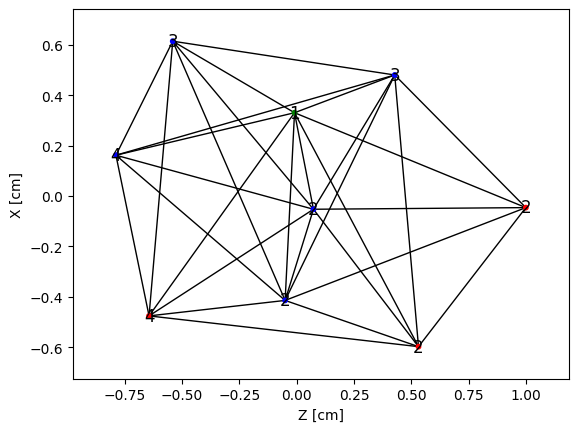

In [9]:
#############################
# Graph checking
#############################
graph_index = 0

print('================================================================================')
print(f'Number of nodes: {data_set_FC[graph_index].num_nodes}')
print(f'Number of edges: {data_set_FC[graph_index].num_edges}')
print(data_set_FC[graph_index].edge_index)
print(f'Has isolated nodes: {data_set_FC[graph_index].has_isolated_nodes()}')
print(f'Has self-loops: {data_set_FC[graph_index].has_self_loops()}')
print(f'Is undirected: {data_set_FC[graph_index].is_undirected()}')
print('================================================================================')

G = nx.Graph()

color_map = []
node_sizes = []
labeldict = {}

# Add nodes
for node_index in range(len(data_set_FC[graph_index].x)) :
    node_x = data_set_FC[graph_index].x[node_index]
    
    G.add_node(node_index, pos=(node_x[4].item() * vertexZInterval, node_x[2].item() * vertexXInterval))
    
    labeldict[node_index] = str(true_gen_vis[graph_index][node_index])
    
    if (node_x[15]) : # isNeutrino
        color_map.append('green')
        node_sizes.append(10)
    else :
        if node_x[0] > 0.25 : # track score
            color_map.append('blue')
        else :
            color_map.append('red')
        node_sizes.append(10)

# Add edges
for edge_index in range(len(data_set_FC[graph_index].edge_index[0])) :
    source_index = data_set_FC[graph_index].edge_index[0][edge_index].item()
    target_index = data_set_FC[graph_index].edge_index[1][edge_index].item()
    
    G.add_edge(source_index, target_index)

# Get position dictionary
pos = nx.get_node_attributes(G,'pos')

# Draw
fig, ax = plt.subplots()
#nx.draw(G, pos, node_color=color_map, node_size=node_sizes, with_labels=True, ax=ax)
nx.draw(G, node_color=color_map, labels=labeldict, node_size=node_sizes, with_labels=True, ax=ax)
limits=plt.axis('on')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel('Z [cm]')
ax.set_ylabel('X [cm]')


In [10]:
torch.save(data_set_pos, 'data_set_pos_particleToParticle_messageDirectional_truthDirectional_80.pt')
torch.save(data_set_neg, 'data_set_neg_particleToParticle_messageDirectional_truthDirectional_80.pt')
torch.save(data_set_FC, 'data_set_FC_particleToParticle_messageDirectional_truthDirectional_80.pt')

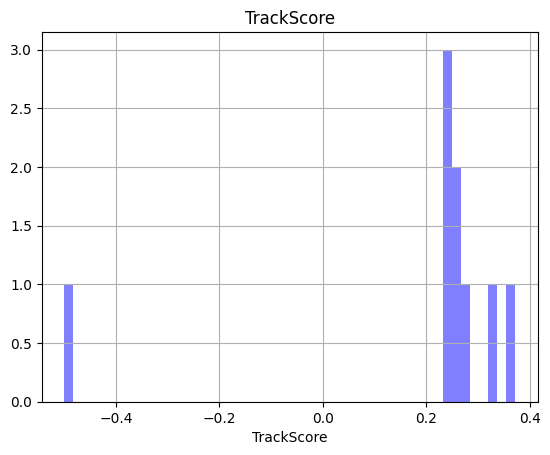

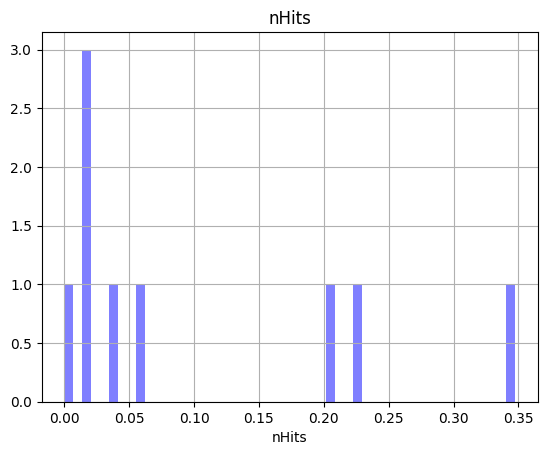

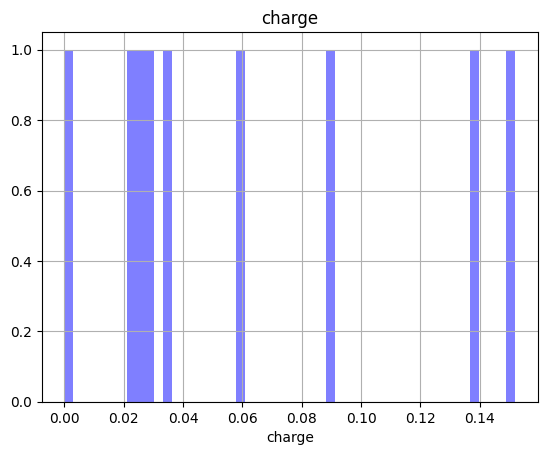

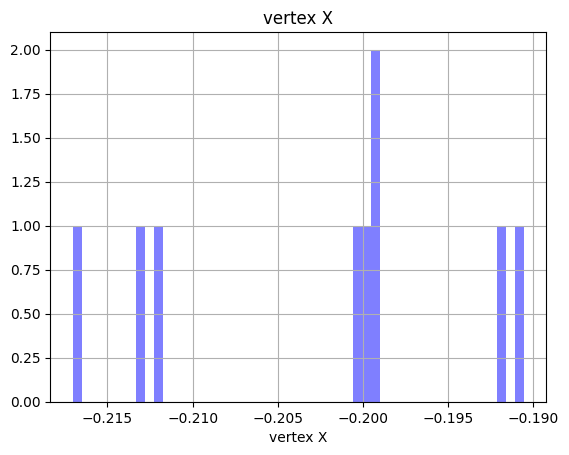

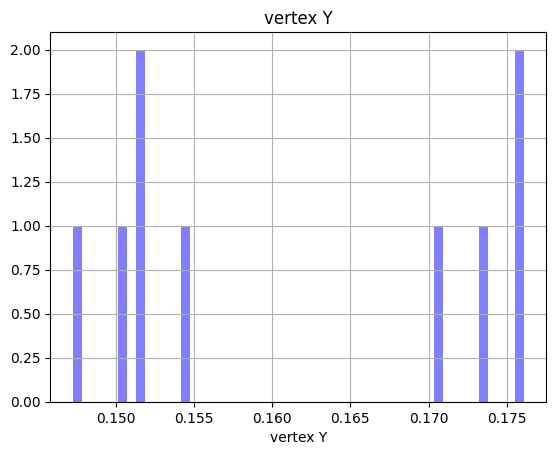

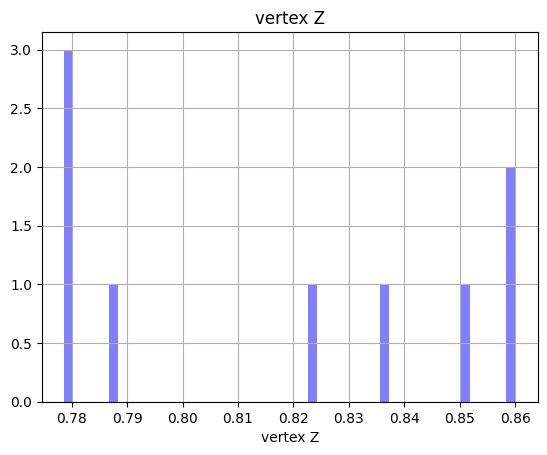

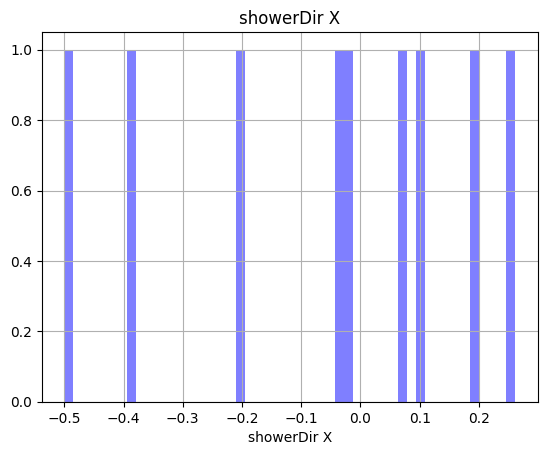

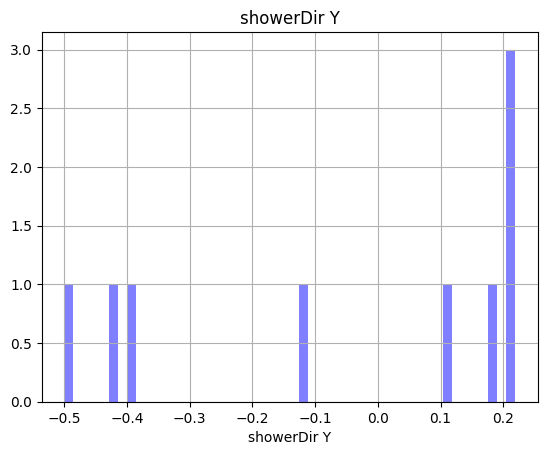

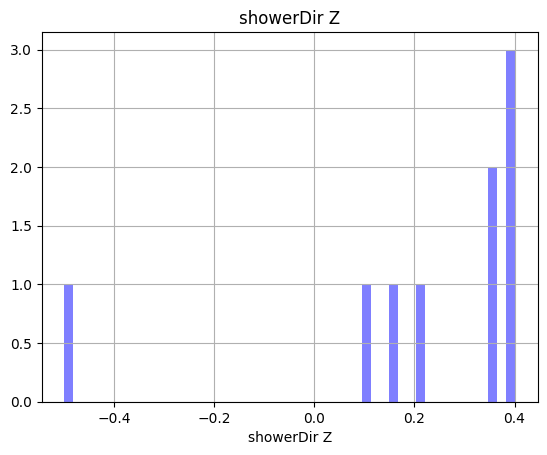

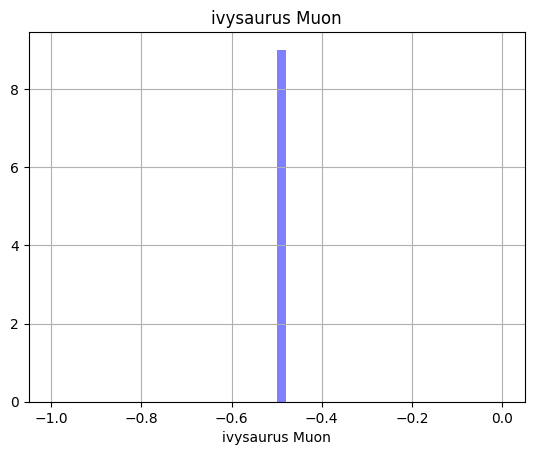

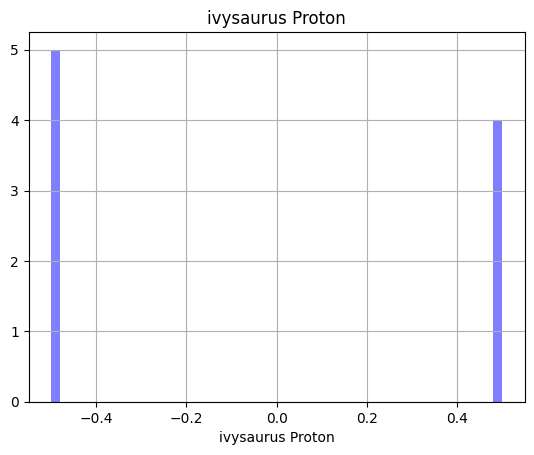

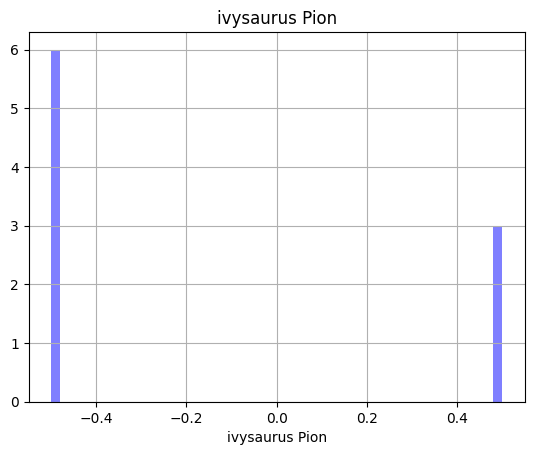

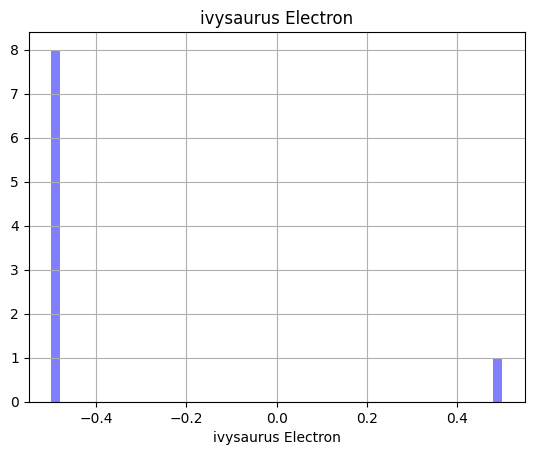

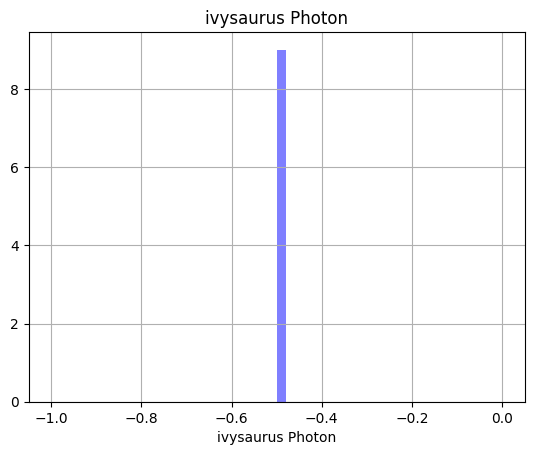

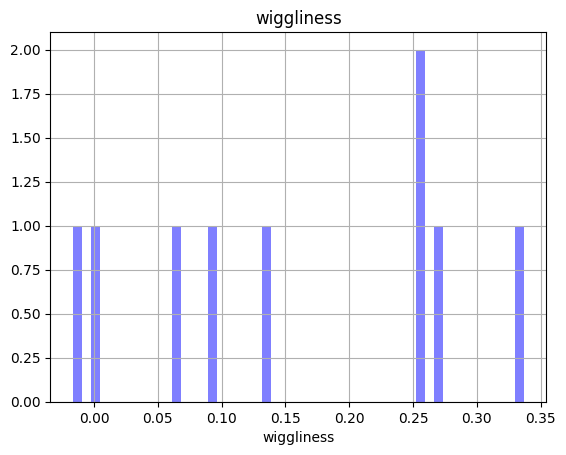

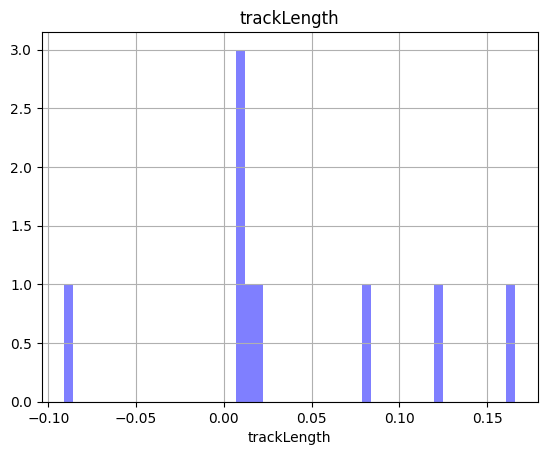

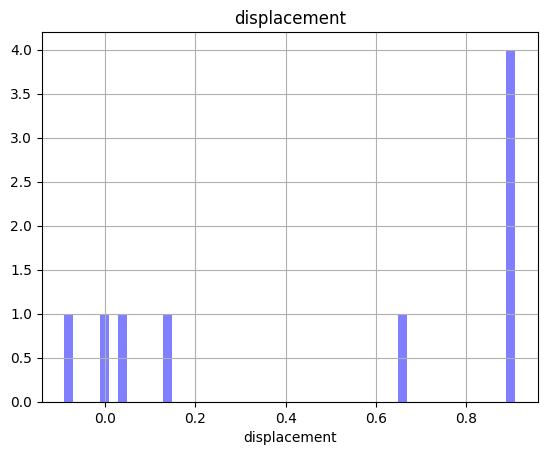

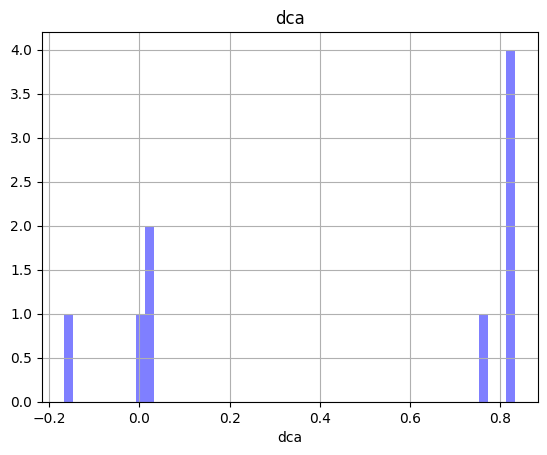

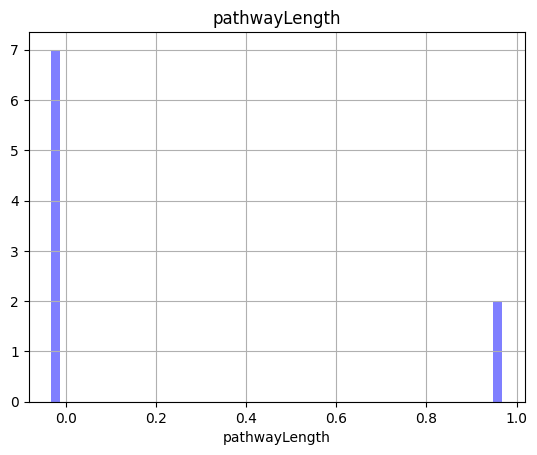

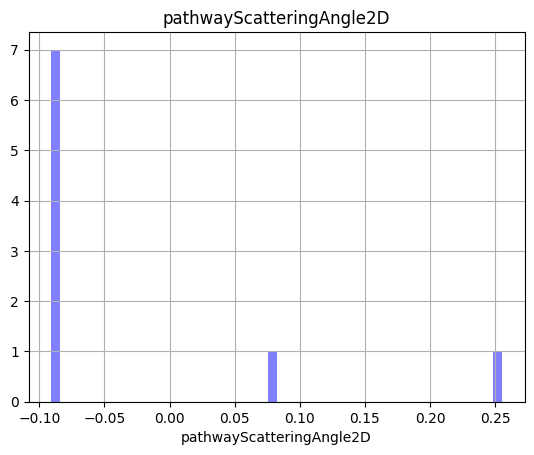

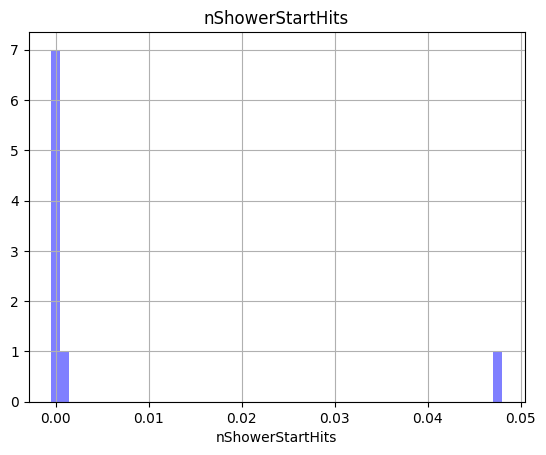

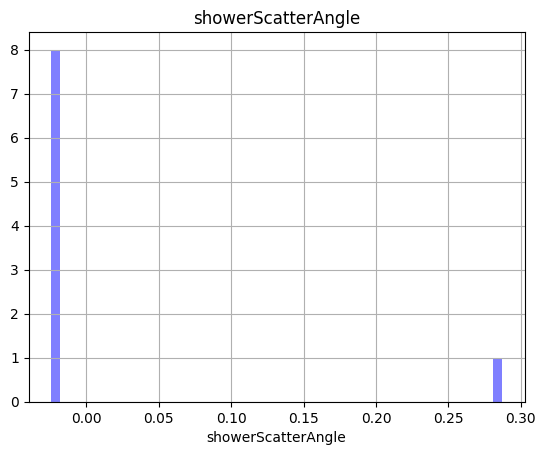

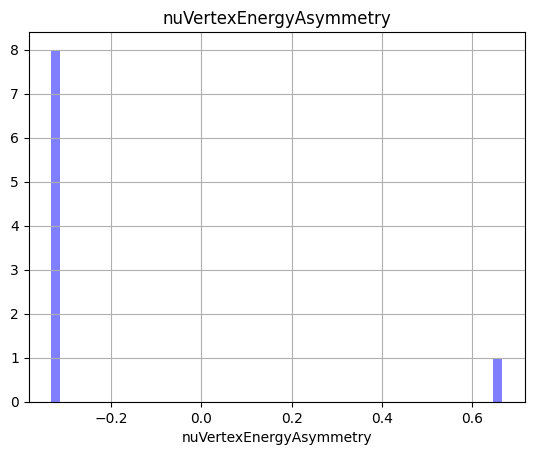

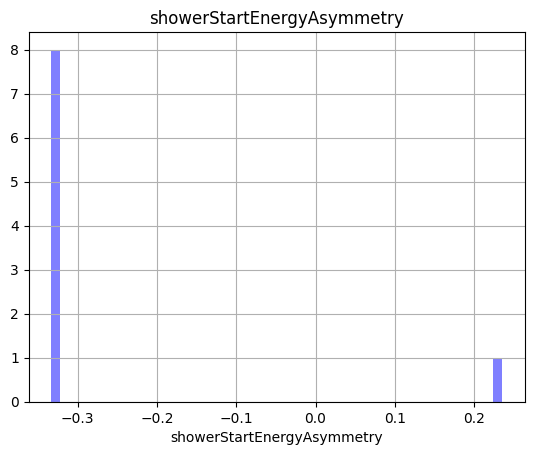

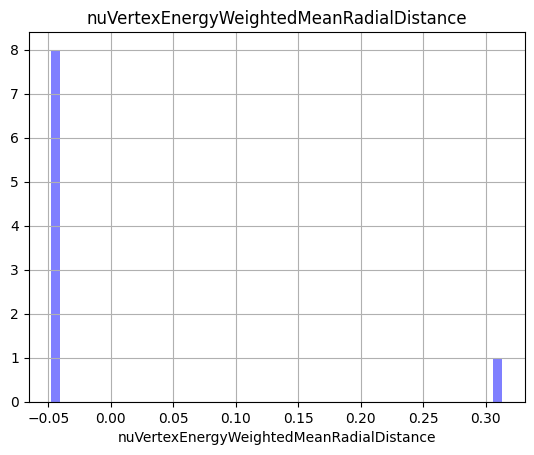

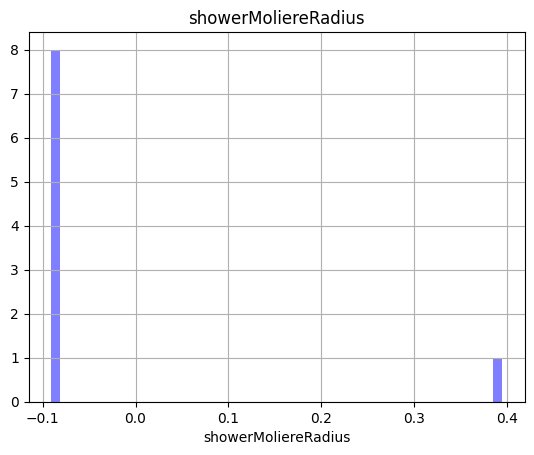

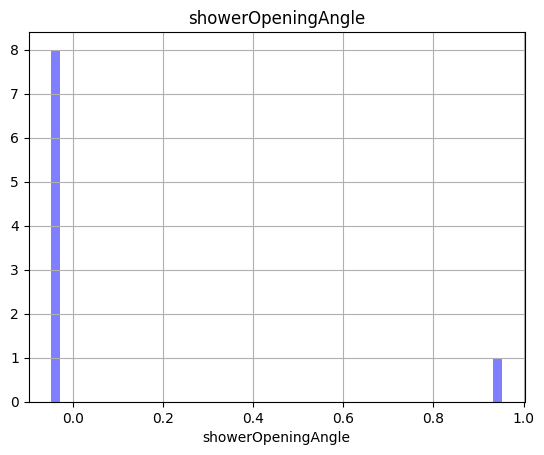

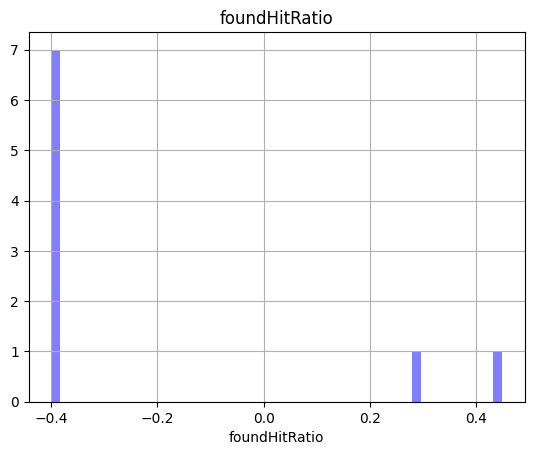

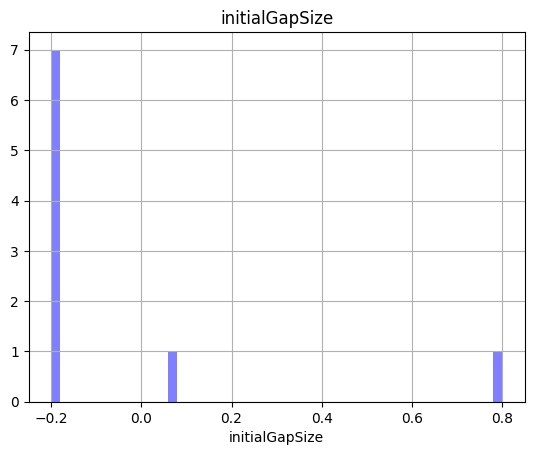

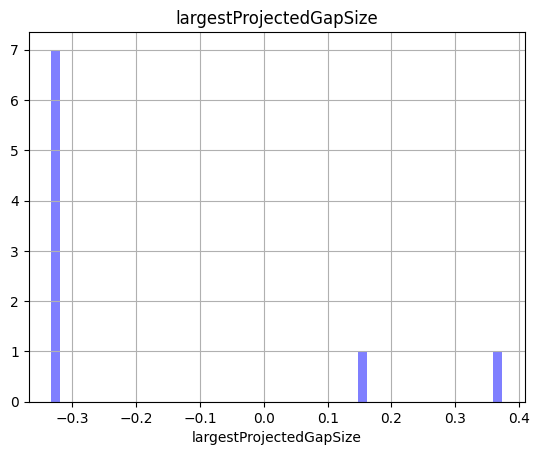

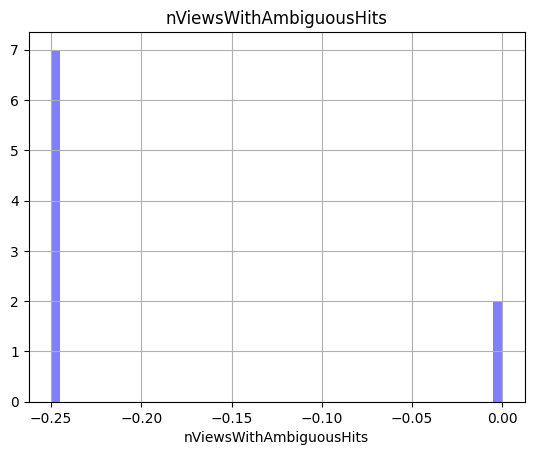

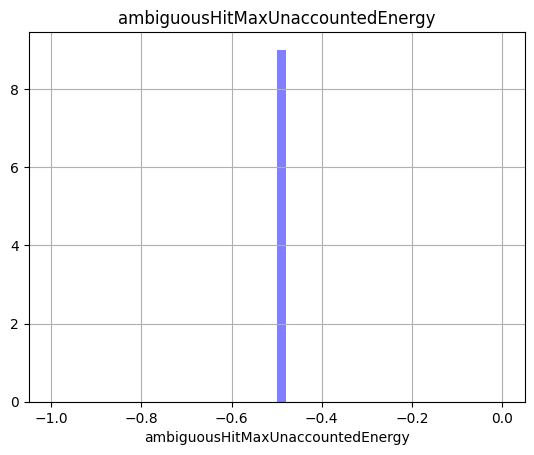

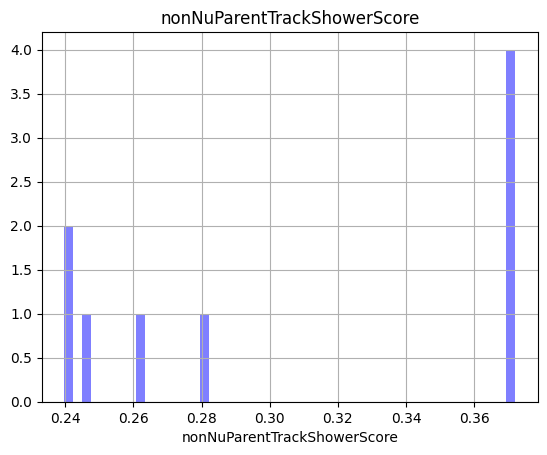

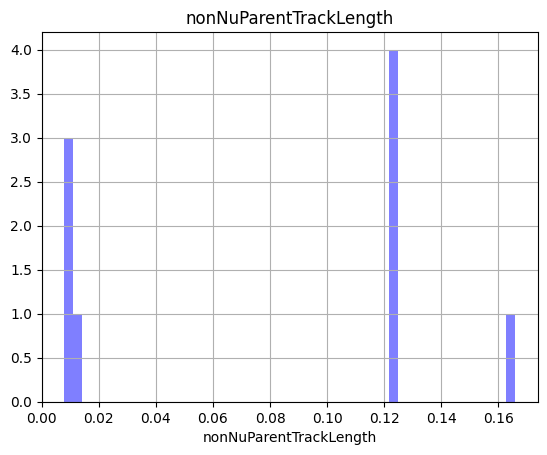

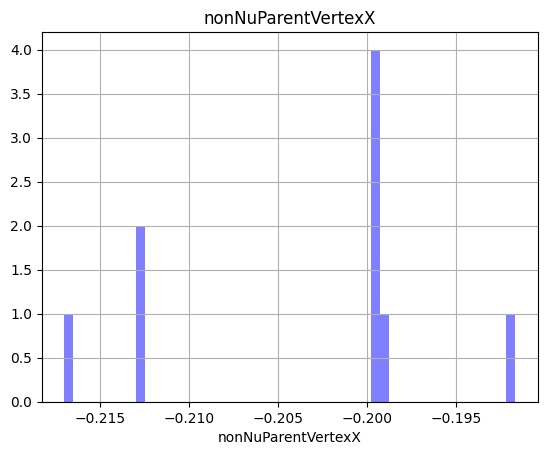

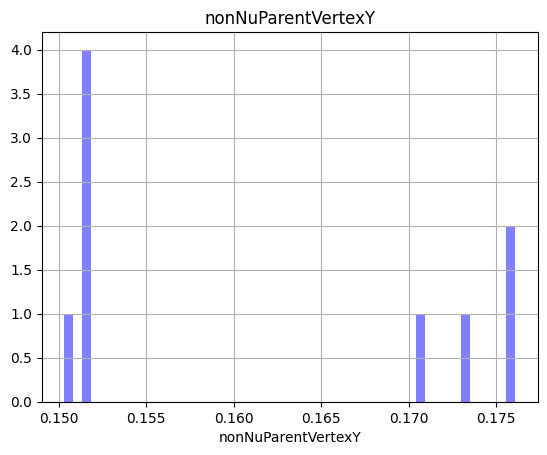

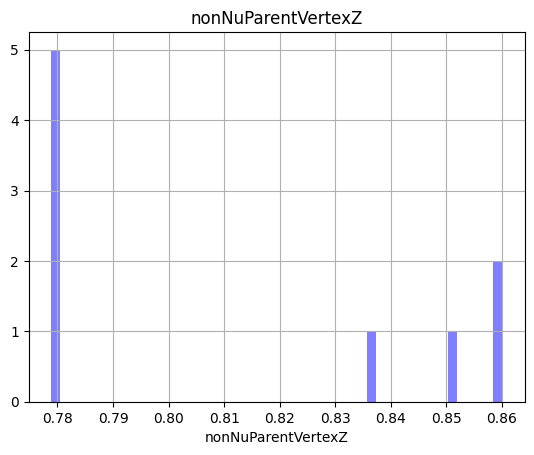

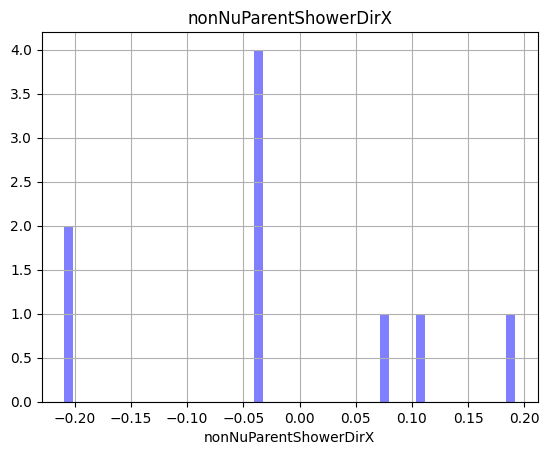

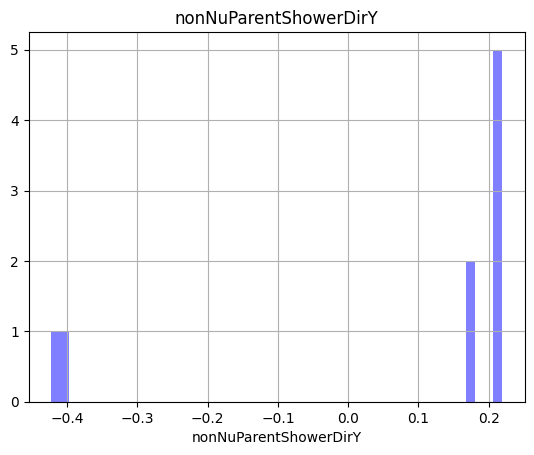

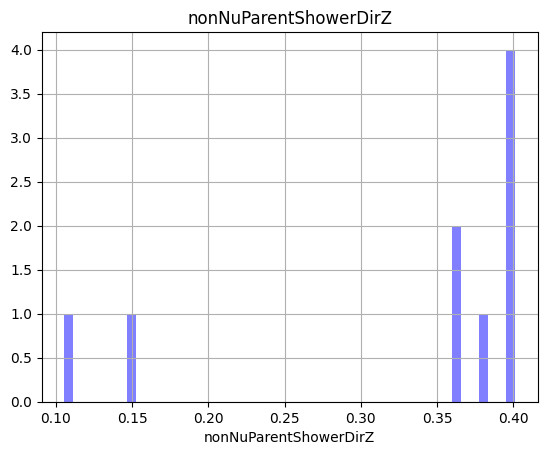

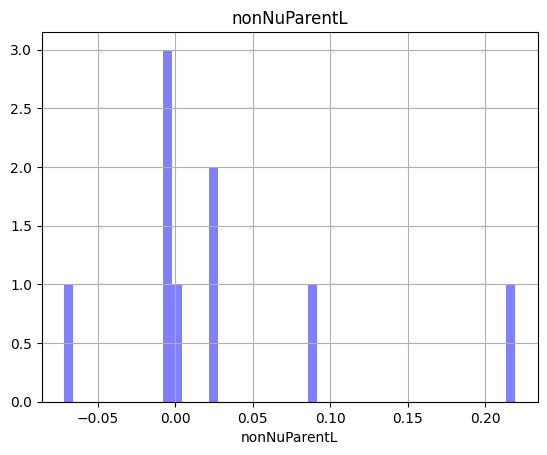

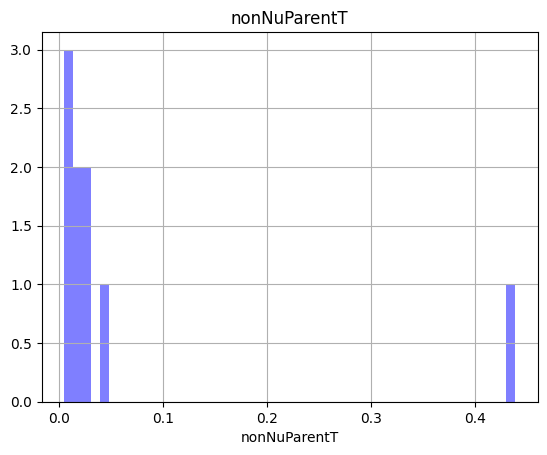

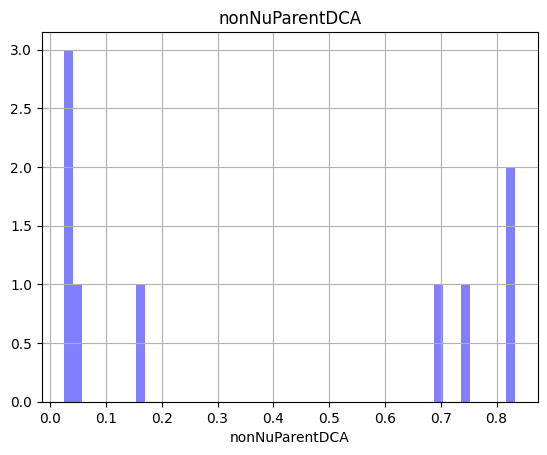

In [11]:
#############################
# Visualise node vars ...
#############################
if PLOT_DISTRIBUTIONS :
    
    plt.hist(trackShowerScore_vis, bins=50, alpha=0.5, color='blue')
    plt.title('TrackScore')
    plt.xlabel('TrackScore')
    plt.grid(True)
    plt.show()
    
    plt.hist(nHits_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nHits')
    plt.xlabel('nHits')
    plt.grid(True)
    plt.show()
    
    plt.hist(charge_vis, bins=50, alpha=0.5, color='blue')
    plt.title('charge')
    plt.xlabel('charge')
    plt.grid(True)
    plt.show()
    
    plt.hist(vertexX_vis, bins=50, alpha=0.5, color='blue')
    plt.title('vertex X')
    plt.xlabel('vertex X')
    plt.grid(True)
    plt.show()

    plt.hist(vertexY_vis, bins=50, alpha=0.5, color='blue')
    plt.title('vertex Y')
    plt.xlabel('vertex Y')
    plt.grid(True)
    plt.show()
    
    plt.hist(vertexZ_vis, bins=50, alpha=0.5, color='blue')
    plt.title('vertex Z')
    plt.xlabel('vertex Z')
    plt.grid(True)
    plt.show()

    plt.hist(showerDirX_vis, bins=50, alpha=0.5, color='blue')
    plt.title('showerDir X')
    plt.xlabel('showerDir X')
    plt.grid(True)
    plt.show()
    
    plt.hist(showerDirY_vis, bins=50, alpha=0.5, color='blue')
    plt.title('showerDir Y')
    plt.xlabel('showerDir Y')
    plt.grid(True)
    plt.show()
    
    plt.hist(showerDirZ_vis, bins=50, alpha=0.5, color='blue')
    plt.title('showerDir Z')
    plt.xlabel('showerDir Z')
    plt.grid(True)
    plt.show()
    
    plt.hist(ivysaurusMuon_vis, bins=50, alpha=0.5, color='blue')
    plt.title('ivysaurus Muon')
    plt.xlabel('ivysaurus Muon')
    plt.grid(True)
    plt.show()
    
    plt.hist(ivysaurusProton_vis, bins=50, alpha=0.5, color='blue')
    plt.title('ivysaurus Proton')
    plt.xlabel('ivysaurus Proton')
    plt.grid(True)
    plt.show()
    
    plt.hist(ivysaurusPion_vis, bins=50, alpha=0.5, color='blue')
    plt.title('ivysaurus Pion')
    plt.xlabel('ivysaurus Pion')
    plt.grid(True)
    plt.show()
    
    plt.hist(ivysaurusElectron_vis, bins=50, alpha=0.5, color='blue')
    plt.title('ivysaurus Electron')
    plt.xlabel('ivysaurus Electron')
    plt.grid(True)
    plt.show()

    plt.hist(ivysaurusPhoton_vis, bins=50, alpha=0.5, color='blue')
    plt.title('ivysaurus Photon')
    plt.xlabel('ivysaurus Photon')
    plt.grid(True)
    plt.show()
    
    plt.hist(wiggliness_vis, bins=50, alpha=0.5, color='blue')
    plt.title('wiggliness')
    plt.xlabel('wiggliness')
    plt.grid(True)
    plt.show()
    
    plt.hist(trackLength_vis, bins=50, alpha=0.5, color='blue')
    plt.title('trackLength')
    plt.xlabel('trackLength')
    plt.grid(True)
    plt.show()
    
    plt.hist(displacement_vis, bins=50, alpha=0.5, color='blue')
    plt.title('displacement')
    plt.xlabel('displacement')
    plt.grid(True)
    plt.show()
    
    plt.hist(dca_vis, bins=50, alpha=0.5, color='blue')
    plt.title('dca')
    plt.xlabel('dca')
    plt.grid(True)
    plt.show()
    
    plt.hist(pathwayLength_vis, bins=50, alpha=0.5, color='blue')
    plt.title('pathwayLength')
    plt.xlabel('pathwayLength')
    plt.grid(True)
    plt.show()   

    plt.hist(pathwayScatteringAngle2D_vis, bins=50, alpha=0.5, color='blue')
    plt.title('pathwayScatteringAngle2D')
    plt.xlabel('pathwayScatteringAngle2D')
    plt.grid(True)
    plt.show()
    
    plt.hist(nShowerStartHits_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nShowerStartHits')
    plt.xlabel('nShowerStartHits')
    plt.grid(True)
    plt.show()    
    
    plt.hist(showerScatterAngle_vis, bins=50, alpha=0.5, color='blue')
    plt.title('showerScatterAngle')
    plt.xlabel('showerScatterAngle')
    plt.grid(True)
    plt.show()
    
    plt.hist(nuVertexEnergyAsymmetry_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nuVertexEnergyAsymmetry')
    plt.xlabel('nuVertexEnergyAsymmetry')
    plt.grid(True)
    plt.show()
        
    plt.hist(showerStartEnergyAsymmetry_vis, bins=50, alpha=0.5, color='blue')
    plt.title('showerStartEnergyAsymmetry')
    plt.xlabel('showerStartEnergyAsymmetry')
    plt.grid(True)
    plt.show()
    
    plt.hist(nuVertexEnergyWeightedMeanRadialDistance_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nuVertexEnergyWeightedMeanRadialDistance')
    plt.xlabel('nuVertexEnergyWeightedMeanRadialDistance')
    plt.grid(True)
    plt.show()
    
    plt.hist(showerMoliereRadius_vis, bins=50, alpha=0.5, color='blue')
    plt.title('showerMoliereRadius')
    plt.xlabel('showerMoliereRadius')
    plt.grid(True)
    plt.show()
    
    plt.hist(showerOpeningAngle_vis, bins=50, alpha=0.5, color='blue')
    plt.title('showerOpeningAngle')
    plt.xlabel('showerOpeningAngle')
    plt.grid(True)
    plt.show()
    
    plt.hist(foundHitRatio_vis, bins=50, alpha=0.5, color='blue')
    plt.title('foundHitRatio')
    plt.xlabel('foundHitRatio')
    plt.grid(True)
    plt.show()
    
    plt.hist(initialGapSize_vis, bins=50, alpha=0.5, color='blue')
    plt.title('initialGapSize')
    plt.xlabel('initialGapSize')
    plt.grid(True)
    plt.show()
    
    plt.hist(largestProjectedGapSize_vis, bins=50, alpha=0.5, color='blue')
    plt.title('largestProjectedGapSize')
    plt.xlabel('largestProjectedGapSize')
    plt.grid(True)
    plt.show()

    plt.hist(nViewsWithAmbiguousHits_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nViewsWithAmbiguousHits')
    plt.xlabel('nViewsWithAmbiguousHits')
    plt.grid(True)
    plt.show()
    
    plt.hist(ambiguousHitMaxUnaccountedEnergy_vis, bins=50, alpha=0.5, color='blue')
    plt.title('ambiguousHitMaxUnaccountedEnergy')
    plt.xlabel('ambiguousHitMaxUnaccountedEnergy')
    plt.grid(True)
    plt.show()
    
    plt.hist(nonNuParentTrackShowerScore_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nonNuParentTrackShowerScore')
    plt.xlabel('nonNuParentTrackShowerScore')
    plt.grid(True)
    plt.show()
    
    plt.hist(nonNuParentTrackLength_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nonNuParentTrackLength')
    plt.xlabel('nonNuParentTrackLength')
    plt.grid(True)
    plt.show()
    
    plt.hist(nonNuParentVertexX_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nonNuParentVertexX')
    plt.xlabel('nonNuParentVertexX')
    plt.grid(True)
    plt.show()
    
    plt.hist(nonNuParentVertexY_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nonNuParentVertexY')
    plt.xlabel('nonNuParentVertexY')
    plt.grid(True)
    plt.show()
    
    plt.hist(nonNuParentVertexZ_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nonNuParentVertexZ')
    plt.xlabel('nonNuParentVertexZ')
    plt.grid(True)
    plt.show()
    
    plt.hist(nonNuParentShowerDirX_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nonNuParentShowerDirX')
    plt.xlabel('nonNuParentShowerDirX')
    plt.grid(True)
    plt.show()
    
    plt.hist(nonNuParentShowerDirY_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nonNuParentShowerDirY')
    plt.xlabel('nonNuParentShowerDirY')
    plt.grid(True)
    plt.show()
    
    plt.hist(nonNuParentShowerDirZ_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nonNuParentShowerDirZ')
    plt.xlabel('nonNuParentShowerDirZ')
    plt.grid(True)
    plt.show()
    
    
    plt.hist(nonNuParentL_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nonNuParentL')
    plt.xlabel('nonNuParentL')
    plt.grid(True)
    plt.show()
    
    plt.hist(nonNuParentT_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nonNuParentT')
    plt.xlabel('nonNuParentT')
    plt.grid(True)
    plt.show()
    
    plt.hist(nonNuParentDCA_vis, bins=50, alpha=0.5, color='blue')
    plt.title('nonNuParentDCA')
    plt.xlabel('nonNuParentDCA')
    plt.grid(True)
    plt.show()    